In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
## First of all , import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('customer_data.csv')                    ## read data with 'read_csv'
data.head()                      ## show first 5 row

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df = pd.DataFrame(data)                  ## convert data to dataframe
df = df.drop('CUST_ID' , axis = 1)        ## drop useless feature
df.describe()                           ## describe features

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
## بنظر میرسد که در ستون های حداقل میزان پرداخت و محدودیت اعتبار میسینگ ولیو داریم

In [6]:
df.shape              ## shape of dataframe

(8950, 17)

In [7]:
df.info()               ## information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# DataSciens

## 1) Data visualization and noise detection

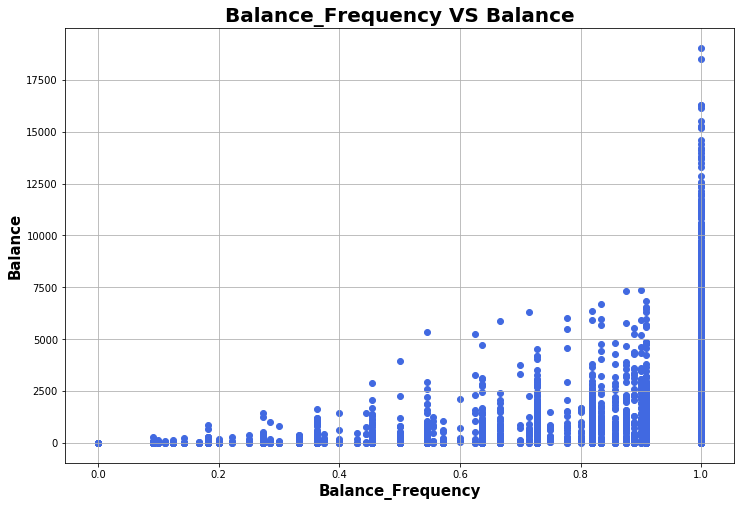

In [8]:
plt.figure(figsize=(12 , 8))
plt.scatter(df['BALANCE_FREQUENCY'] , df['BALANCE'] , color='royalblue')
plt.xlabel('Balance_Frequency' , fontsize=15 , fontweight ='bold')
plt.ylabel('Balance' , fontsize=15 , fontweight ='bold')
plt.title('Balance_Frequency VS Balance', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

In [9]:
## مشخصا به طور کلی هرچقدر دفعات بروزرسانی موجودی بیشتر باشد مبلغ موجودی حساب نیز بیشتر است 
## بیشترین مبالغ موجودی در حساب مربوط به مشتریانی است که مرتبا موجودی حسابشان را بروزرسانی کرده اند
## اطلاعات تمامی داده ها منطقی است و هیچکدام مشکوک به نویز نیستند

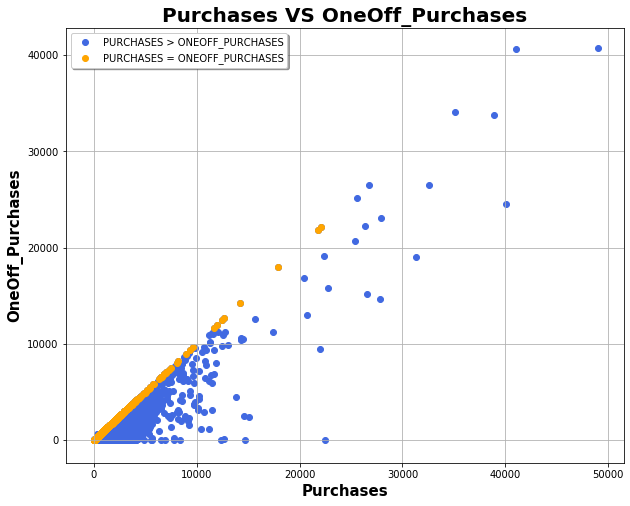

In [10]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES'] , df['ONEOFF_PURCHASES'] , color='royalblue' , label = 'PURCHASES > ONEOFF_PURCHASES')
plt.scatter(df[(df['PURCHASES'] == df['ONEOFF_PURCHASES'])]['PURCHASES'] ,
            df[(df['PURCHASES'] == df['ONEOFF_PURCHASES'])]['ONEOFF_PURCHASES'] , color = 'orange'
            , label = 'PURCHASES = ONEOFF_PURCHASES')
plt.xlabel('Purchases' , fontsize=15 , fontweight ='bold')
plt.ylabel('OneOff_Purchases' , fontsize=15 , fontweight ='bold')
plt.title('Purchases VS OneOff_Purchases', fontsize=20 , fontweight ='bold')
plt.grid()
plt.legend(loc = 'best' , shadow=True)
plt.show()

In [11]:
## به طور کلی هرچقدر مقدار خریدهای انجام شده از حساب بیشتر باشد حداکثر مقدار خرید با یک بار رفتن نیز بیشتر میشود
## طبیعی ست که برای هر سمپل حداکثر مقدار خرید با یک بار رفتن از مجموع تمامی خرید های انجام شده کمتر یا برابر باشد

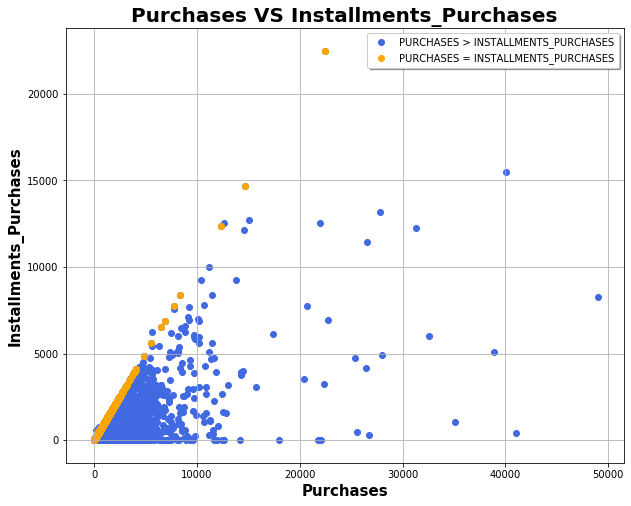

In [12]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES'] , df['INSTALLMENTS_PURCHASES'] , color='royalblue' , label = 'PURCHASES > INSTALLMENTS_PURCHASES')
plt.scatter(df[(df['PURCHASES'] == df['INSTALLMENTS_PURCHASES'])]['PURCHASES'] ,
            df[(df['PURCHASES'] == df['INSTALLMENTS_PURCHASES'])]['INSTALLMENTS_PURCHASES'] , color = 'orange' ,
            label = 'PURCHASES = INSTALLMENTS_PURCHASES')
plt.xlabel('Purchases' , fontsize=15 , fontweight ='bold')
plt.ylabel('Installments_Purchases' , fontsize=15 , fontweight ='bold')
plt.title('Purchases VS Installments_Purchases', fontsize=20 , fontweight ='bold')
plt.grid()
plt.legend(loc = 'best' , shadow=True)
plt.show()

In [13]:
## به طور کلی هرچقدر مقدار خریدهای انجام شده از حساب بیشتر باشد خرید های اقساطی نیز بیشتر میشود
## طبیعی ست که برای هر سمپل خرید های اقساطی از مجموع تمامی خرید های انجام شده کمتر یا برابر باشد

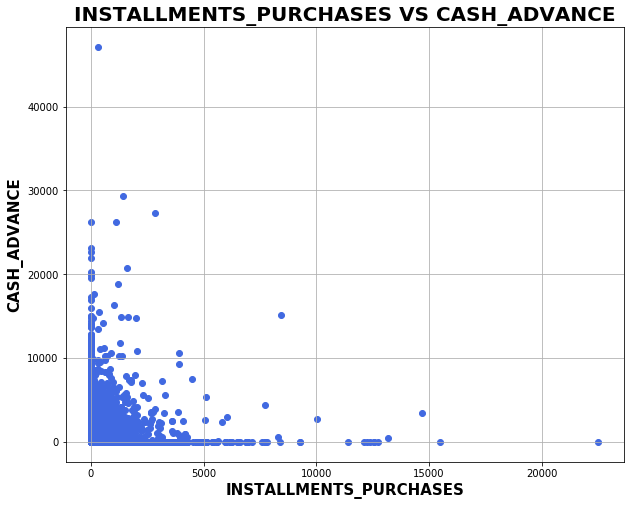

In [14]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['INSTALLMENTS_PURCHASES'] , df['CASH_ADVANCE'] , color='royalblue')
plt.xlabel('INSTALLMENTS_PURCHASES' , fontsize=15 , fontweight ='bold')
plt.ylabel('CASH_ADVANCE' , fontsize=15 , fontweight ='bold')
plt.title('INSTALLMENTS_PURCHASES VS CASH_ADVANCE', fontsize=20 , fontweight ='bold')
plt.grid()

plt.show()

In [15]:
## پیش پرداخت نقدی با خرید اقساطی رابطه عکس دارند به این صورت که هرچقدر مبلغ پیش پرداخت بیشتر باشد مبلغ قسط کمتر است

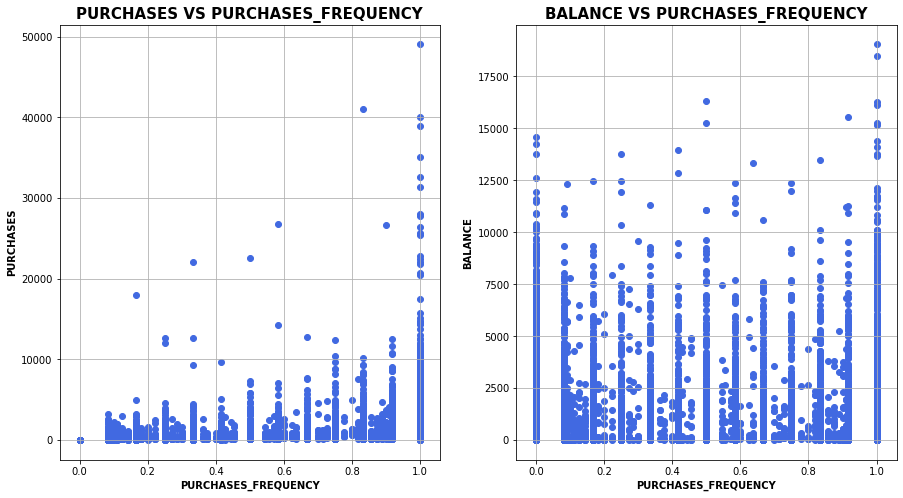

In [16]:
plt.figure(figsize=(15 , 8))
plt.subplot(1 , 2, 1)
plt.scatter(df['PURCHASES_FREQUENCY'] , df['PURCHASES'] , color='royalblue')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.ylabel('PURCHASES' , fontsize=10 , fontweight ='bold')
plt.title('PURCHASES VS PURCHASES_FREQUENCY', fontsize=15 , fontweight ='bold')
plt.grid()
plt.subplot(1 , 2, 2)
plt.scatter(df['PURCHASES_FREQUENCY'] , df['BALANCE'] , color='royalblue')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.ylabel('BALANCE' , fontsize=10 , fontweight ='bold')
plt.title('BALANCE VS PURCHASES_FREQUENCY', fontsize=15 , fontweight ='bold')
plt.grid()
plt.show()

In [17]:
## با توجه به نمودار اول هرچه دفعات خرید بیشتر شود مقدار خریدهای انجام شده نیز بیشتر میشود و این امری محسوس و منطقی ست
## با توجه به نمودار دوم مشتریانی که بیشترین و کمترین دفعات خرید را دارند بیشترین میزان موجودی را دارند
## قطعا مشتریانی که همزمان موجودی حساب زیاد و دفعات خرید بیشتری دارند مشتریان مهمتری محسوب میشوند

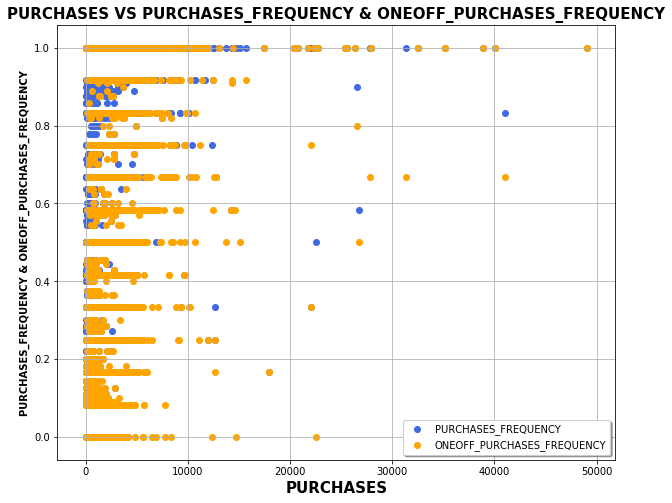

In [18]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES'] , df['PURCHASES_FREQUENCY'] , color='royalblue' , label = 'PURCHASES_FREQUENCY')
plt.scatter(df['PURCHASES'] , df['ONEOFF_PURCHASES_FREQUENCY'] , color='orange' , label = 'ONEOFF_PURCHASES_FREQUENCY')
plt.xlabel('PURCHASES' , fontsize=15 , fontweight ='bold')
plt.ylabel('PURCHASES_FREQUENCY & ONEOFF_PURCHASES_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.title('PURCHASES VS PURCHASES_FREQUENCY & ONEOFF_PURCHASES_FREQUENCY', fontsize=15 , fontweight ='bold')
plt.grid()
plt.legend(loc = 'best' , shadow = True)
plt.show()

In [19]:
## به طور کلی هرچه دفعات خرید و دفعات خرید یکباره بیشتر باشد مقدار خریدهای انجام شده نیز بیشتر است
## اغلب خریدهای یکباره بسیار کمتر از خرید های معمولی انجام میشوند

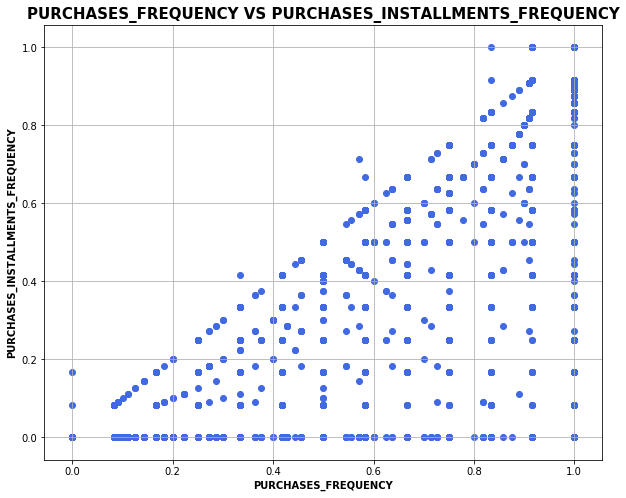

In [20]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_FREQUENCY'] , df['PURCHASES_INSTALLMENTS_FREQUENCY'] , color='royalblue')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.title('PURCHASES_FREQUENCY VS PURCHASES_INSTALLMENTS_FREQUENCY', fontsize=15 , fontweight ='bold')
plt.grid()
plt.show()

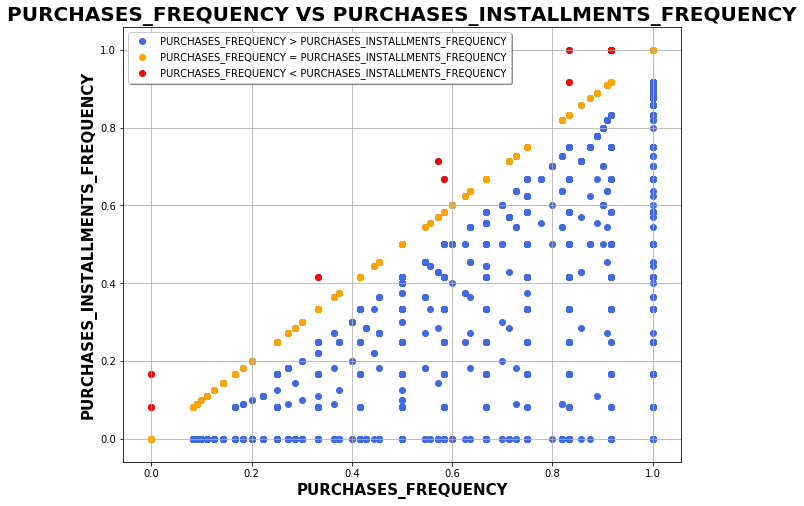

In [21]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_FREQUENCY'] , df['PURCHASES_INSTALLMENTS_FREQUENCY'] , color='royalblue' , label = 'PURCHASES_FREQUENCY > PURCHASES_INSTALLMENTS_FREQUENCY')
plt.scatter(df[(df['PURCHASES_FREQUENCY'] == df['PURCHASES_INSTALLMENTS_FREQUENCY'])]['PURCHASES_FREQUENCY'] ,
            df[(df['PURCHASES_FREQUENCY'] == df['PURCHASES_INSTALLMENTS_FREQUENCY'])]['PURCHASES_INSTALLMENTS_FREQUENCY'] , color = 'orange' ,
            label = 'PURCHASES_FREQUENCY = PURCHASES_INSTALLMENTS_FREQUENCY')
plt.scatter(df[(df['PURCHASES_FREQUENCY'] < df['PURCHASES_INSTALLMENTS_FREQUENCY'])]['PURCHASES_FREQUENCY'] ,
            df[(df['PURCHASES_FREQUENCY'] < df['PURCHASES_INSTALLMENTS_FREQUENCY'])]['PURCHASES_INSTALLMENTS_FREQUENCY'] , color = 'red' ,
            label = 'PURCHASES_FREQUENCY < PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=15 , fontweight ='bold')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY' , fontsize=15 , fontweight ='bold')
plt.title('PURCHASES_FREQUENCY VS PURCHASES_INSTALLMENTS_FREQUENCY', fontsize=20 , fontweight ='bold')
plt.grid()
plt.legend(loc = 'best' , shadow=True)
plt.show()

In [22]:
## هرچقدر دفعات خرید بیشتر باشد دفعات خرید به صورت قسطی افزایش می یابد
## منطقی ست که همیشه دفعات خرید به صورت قسطی از مجموع دفعات خرید کمتر باشد پس در اینجا داده های قرمز به عنوان نویز در نظر گرفته میشوند

In [23]:
# detective noises:

df[(df['PURCHASES_FREQUENCY'] < df['PURCHASES_INSTALLMENTS_FREQUENCY'])]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
423    6032.740391           1.000000    7553.48           2643.53   
459    1492.039988           1.000000    4106.15           2688.46   
560    1311.732049           1.000000   10700.63           2912.65   
758     815.427615           1.000000    1936.01           1471.04   
1438    912.857498           1.000000     831.03             93.00   
1741   3790.914663           1.000000    2655.68           1607.63   
2918   1484.705242           1.000000    2673.30           2272.02   
3609   3516.835582           1.000000    4019.73           1932.75   
4014   3971.701463           1.000000     721.51            175.00   
4682   1089.795044           1.000000       0.00              0.00   
5231     30.692503           0.454545     205.06              0.00   
5673   2648.784405           1.000000    6697.57           5281.17   
5737  10243.147630           1.000000       0.00              0.00   
5967    954.060867           1.000000     279.76              0.00   
6857    592.466798           1.000000    5629.41              0.00   
7078    366.111566           1.000000    3482.90           1350.80   
7429     39.251217           1.000000    1066.62            339.10   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
423                  4909.95      0.000000             0.916667   
459                  1417.69    734.816479             0.333333   
560                  7787.98      0.000000             0.916667   
758                   464.97    232.292989             0.916667   
1438                  738.03      0.000000             0.571429   
1741                 1048.05   6263.883768             0.833333   
2918                  401.28   4104.024116             0.916667   
3609                 2086.98      0.000000             0.916667   
4014                  546.51      0.000000             0.916667   
4682                   20.00     38.249993             0.000000   
5231                  607.76      0.000000             0.916667   
5673                 1416.40      0.000000             0.916667   
5737                   66.95   4501.067550             0.000000   
5967                  578.55    325.076569             0.583333   
6857                 6229.41      0.000000             0.916667   
7078                 2132.10    348.857163             0.916667   
7429                  727.52    204.615371             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
423                     0.750000                          1.000000   
459                     0.250000                          0.416667   
560                     0.500000                          1.000000   
758                     0.500000                          1.000000   
1438                    0.285714                          0.714286   
1741                    0.333333                          1.000000   
2918                    0.666667                          1.000000   
3609                    0.916667                          1.000000   
4014                    0.083333                          1.000000   
4682                    0.000000                          0.166667   
5231                    0.000000                          1.000000   
5673                    0.916667                          1.000000   
5737                    0.000000                          0.083333   
5967                    0.000000                          0.666667   
6857                    0.000000                          1.000000   
7078                    0.666667                          1.000000   
7429                    0.833333                          0.916667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
423                 0.000000                 0             85       13500.0   
459                 0.083333                 1             50       12000.0   
560                 0.000000                 

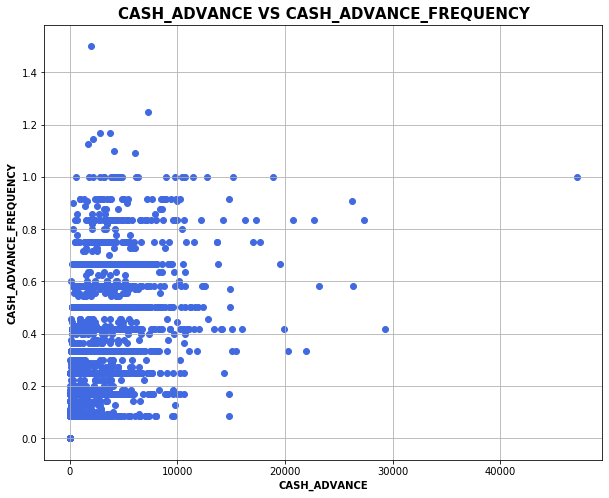

In [24]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['CASH_ADVANCE'] , df['CASH_ADVANCE_FREQUENCY'] , color='royalblue')
plt.xlabel('CASH_ADVANCE' , fontsize=10 , fontweight ='bold')
plt.ylabel('CASH_ADVANCE_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.title('CASH_ADVANCE VS CASH_ADVANCE_FREQUENCY', fontsize=15 , fontweight ='bold')
plt.grid()
plt.show()

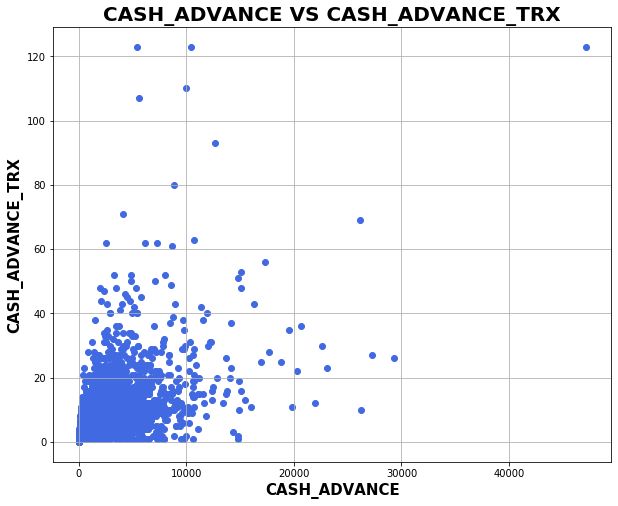

In [25]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['CASH_ADVANCE'] , df['CASH_ADVANCE_TRX'] , color='royalblue')
plt.xlabel('CASH_ADVANCE' , fontsize=15 , fontweight ='bold')
plt.ylabel('CASH_ADVANCE_TRX' , fontsize=15 , fontweight ='bold')
plt.title('CASH_ADVANCE VS CASH_ADVANCE_TRX', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

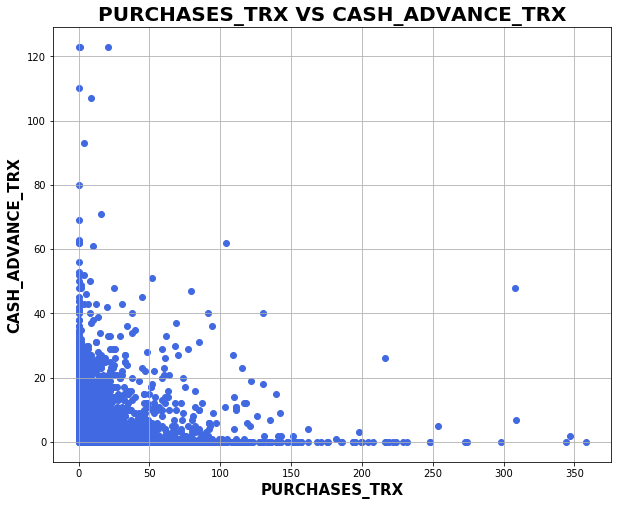

In [26]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_TRX'] , df['CASH_ADVANCE_TRX'] , color='royalblue')
plt.xlabel('PURCHASES_TRX' , fontsize=15 , fontweight ='bold')
plt.ylabel('CASH_ADVANCE_TRX' , fontsize=15 , fontweight ='bold')
plt.title('PURCHASES_TRX VS CASH_ADVANCE_TRX', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

In [27]:
## تعداد معاملات خرید انجام شده رابطه عکس دارد با تعداد معاملاتی که با پیش پرداخت انجام میشود

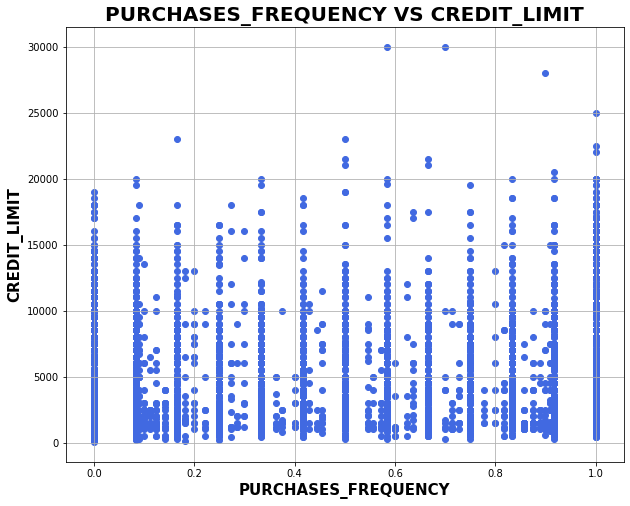

In [28]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_FREQUENCY'] , df['CREDIT_LIMIT'] , color='royalblue')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=15 , fontweight ='bold')
plt.ylabel('CREDIT_LIMIT' , fontsize=15 , fontweight ='bold')
plt.title('PURCHASES_FREQUENCY VS CREDIT_LIMIT', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

## A 'CREDIT LIMIT' is the maximum amount you can charge on a revolving credit account, such as a credit card

In [29]:
## مشتریانی که زیاد خرید میکنند و همچنین مشتریانی که به ندرت خرید میکنند محدودیت اعتباری کمتری دارند

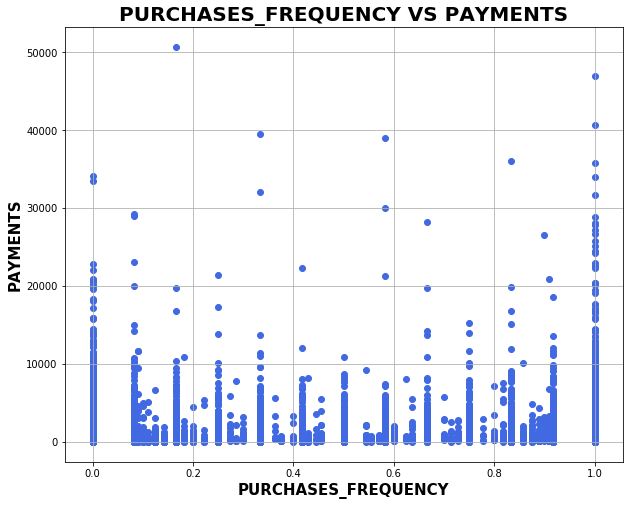

In [30]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_FREQUENCY'] , df['PAYMENTS'] , color='royalblue')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=15 , fontweight ='bold')
plt.ylabel('PAYMENTS' , fontsize=15 , fontweight ='bold')
plt.title('PURCHASES_FREQUENCY VS PAYMENTS', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

In [31]:
## متوسط مبلغ پرداختی توسط مشتریانی که بیشتر خرید میکنند و مشتریانی که به ندرت خرید میکنند نسبت به سایر مشتریان بیشتر است

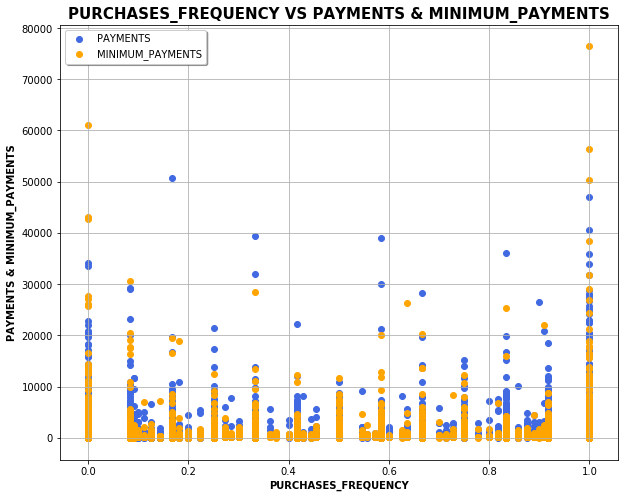

In [32]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PURCHASES_FREQUENCY'] , df['PAYMENTS'] , color='royalblue' , label = 'PAYMENTS')
plt.scatter(df['PURCHASES_FREQUENCY'] , df['MINIMUM_PAYMENTS'] , color='orange' , label = 'MINIMUM_PAYMENTS')
plt.xlabel('PURCHASES_FREQUENCY' , fontsize=10 , fontweight ='bold')
plt.ylabel('PAYMENTS & MINIMUM_PAYMENTS' , fontsize=10 , fontweight ='bold')
plt.title('PURCHASES_FREQUENCY VS PAYMENTS & MINIMUM_PAYMENTS', fontsize=15 , fontweight ='bold')
plt.grid()
plt.legend(loc = 'best' , shadow = True)
plt.show()

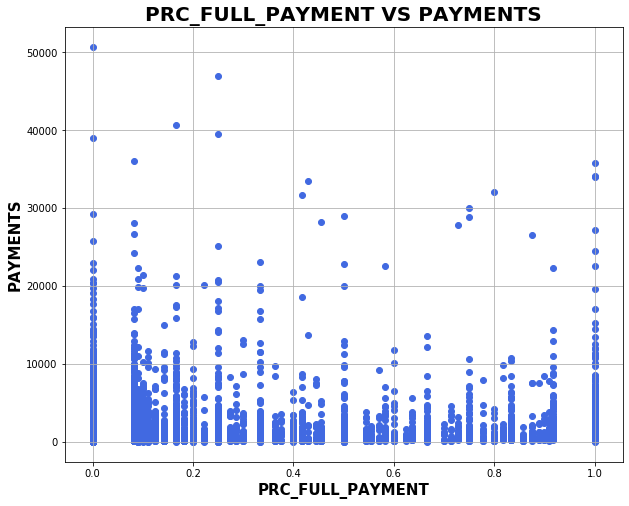

In [33]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['PRC_FULL_PAYMENT'] , df['PAYMENTS'] , color='royalblue')
plt.xlabel('PRC_FULL_PAYMENT' , fontsize=15 , fontweight ='bold')
plt.ylabel('PAYMENTS' , fontsize=15 , fontweight ='bold')
plt.title('PRC_FULL_PAYMENT VS PAYMENTS', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

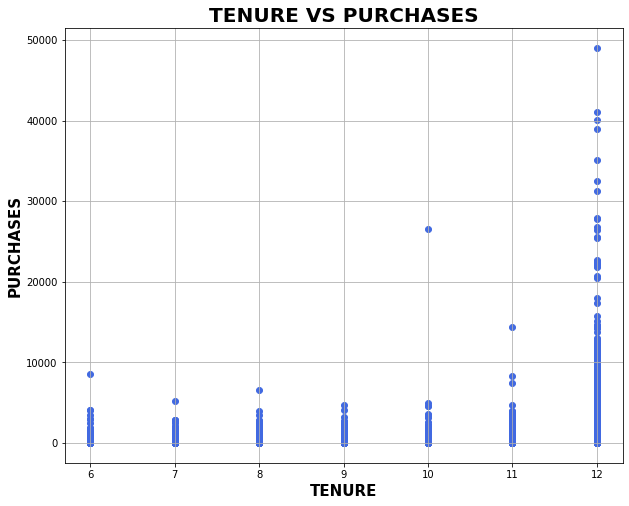

In [34]:
plt.figure(figsize=(10 , 8))
plt.scatter(df['TENURE'] , df['PURCHASES'] , color='royalblue')
plt.xlabel('TENURE' , fontsize=15 , fontweight ='bold')
plt.ylabel('PURCHASES' , fontsize=15 , fontweight ='bold')
plt.title('TENURE VS PURCHASES', fontsize=20 , fontweight ='bold')
plt.grid()
plt.show()

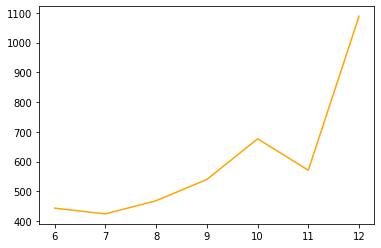

In [35]:
data = df.groupby('TENURE')['PURCHASES'].mean()
plt.plot(data.index , data.values , c = 'orange')
plt.show()

In [36]:
## به طور کلی هرچه خرید های انجام شده توسط مشتریان بیشتر باشد مدت زمان سرویس دهی کارت اعتباری برای مشتری نیز بیشتر است

## 2) Detective Missing Values

In [37]:
print("Show the missing values of DataFrame: \n\n", df.isnull().sum())      # Show the missing values of DataFrame

Show the missing values of DataFrame: 

 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


## 3) Drop Noises & Missing Values

In [38]:
df.dropna(inplace = True)

In [39]:
df = df[(df['PURCHASES_FREQUENCY'] >= df['PURCHASES_INSTALLMENTS_FREQUENCY'])]

## 4) Data visualization

In [40]:
def plot_group(x):
    
    ## The function plot histogram, box plot, 
    ## violin plot, and density distribution plots for each 
    ## feature name passed as the argument
    
    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'purple')
    ax1.axvline(
        np.mean(df[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(df[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x} Density Distribution', fontweight='bold' , fontsize = 15)
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent')
    plt.title(f'{x} Violinplot', fontweight='bold' , fontsize = 15)
    
    plt.subplot(223)
    ax3 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x} Boxplot', fontweight='bold' , fontsize = 15)
    
    plt.subplot(224)
    ax4 = sns.kdeplot(df[x],  shade = True)
    plt.title(f'{x} Cumulative Density Distribution' , fontweight='bold' , fontsize = 15)
    
    plt.show()

In [41]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

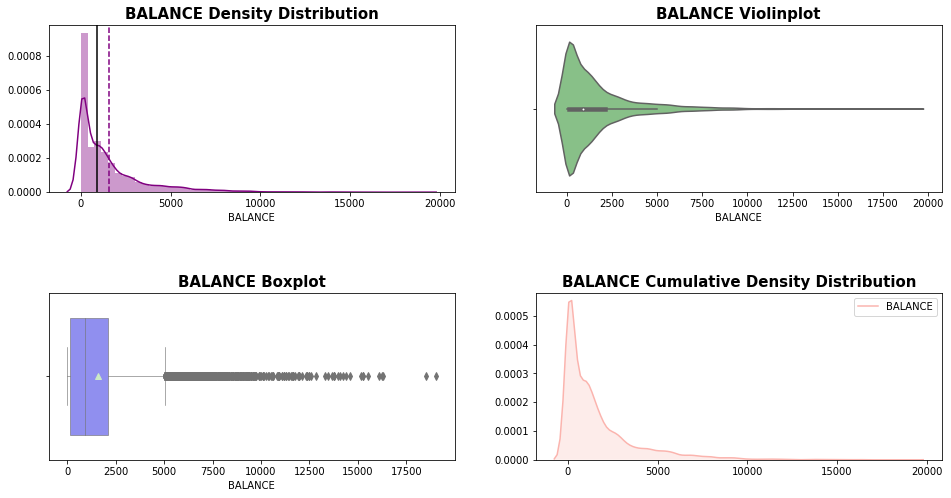

In [42]:
plot_group('BALANCE')

In [43]:
## تراکم دیتاها در بازه بین ۰ تا ۲۵۰۰ بیشتر است
## میانگین داده ها ۱۵۶۴ است

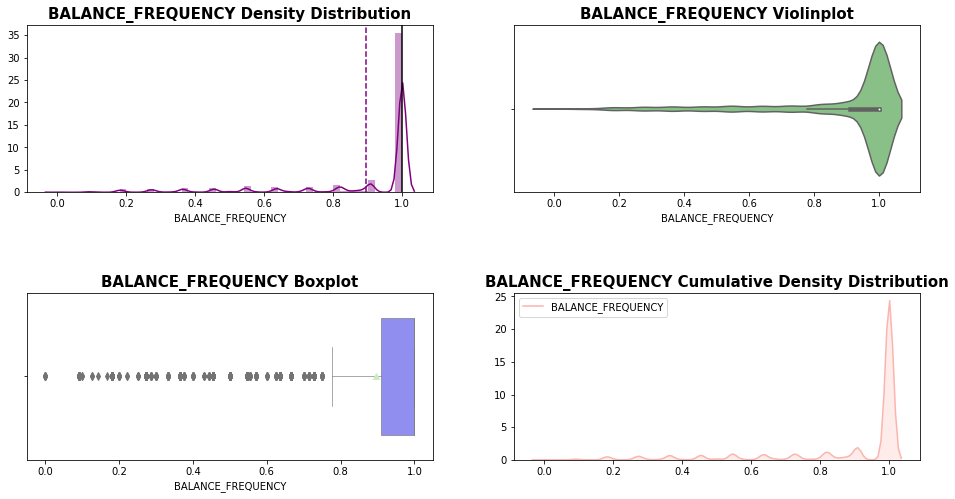

In [44]:
plot_group('BALANCE_FREQUENCY')

In [45]:
## اغلب مشتریان دفعات زیادی موجودی حسابشان را بروزرسانی کرده اند
## میانگین مقادیر ۰.۸۹ است

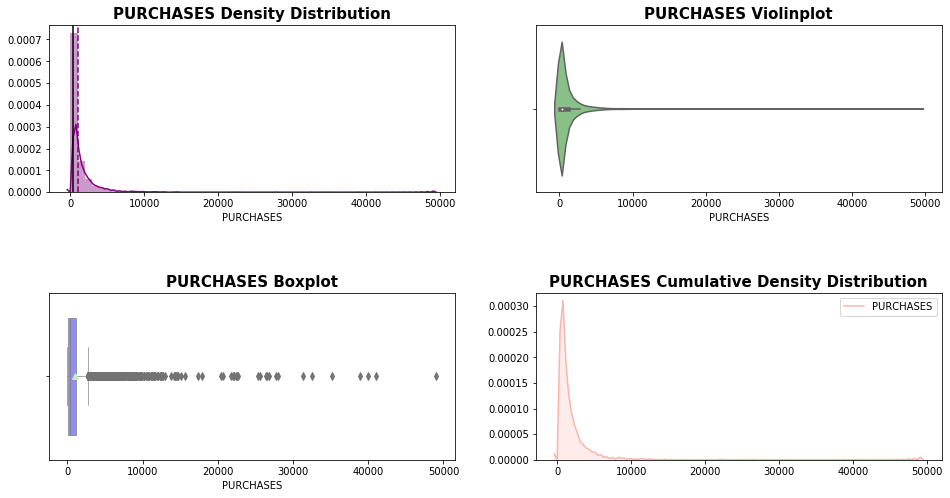

In [46]:
plot_group('PURCHASES')

In [47]:
## اغلب خرید های انجام شده بین ۰ تا ۵۰۰۰ بوده است
## میانگین خرید ۱۰۲۱ است

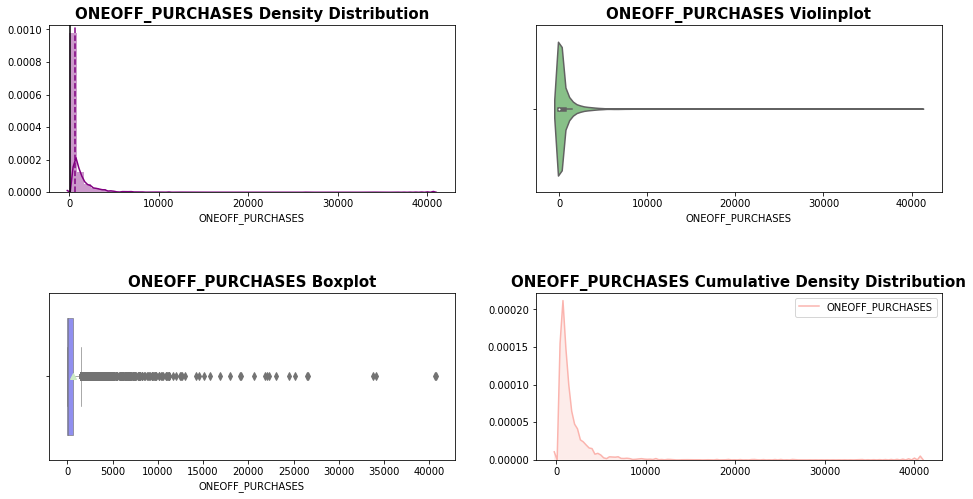

In [48]:
plot_group('ONEOFF_PURCHASES')

In [49]:
## بیشترین خریدهای کلی بین ۰ تا ۵۰۰۰ است
## میانگین خرید های کلی تقریبا ۶۰۴ بوده است

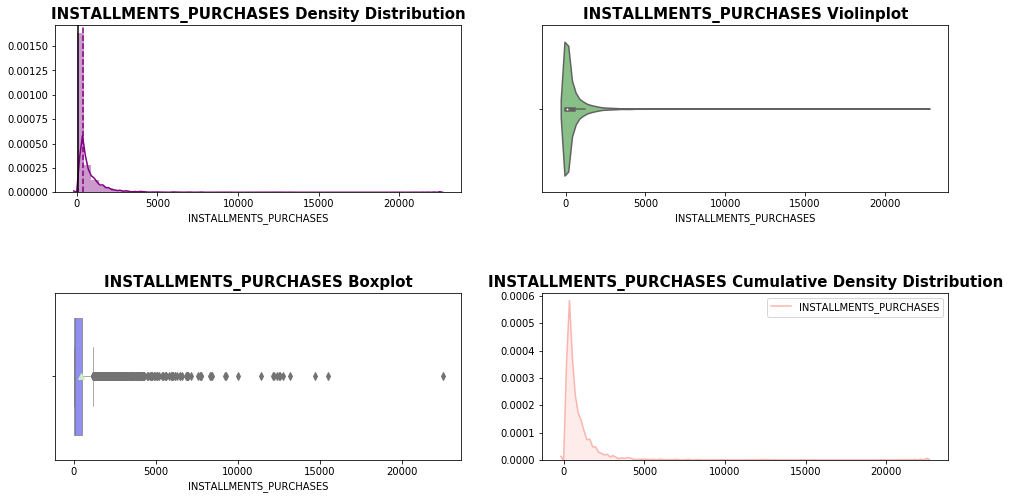

In [50]:
plot_group('INSTALLMENTS_PURCHASES')

In [51]:
## بیشتر خرید های اقساطی بین ۰ تا ۲۵۰۰ بوده است
## میانگین خرید های اقساطی ۴۱۸ بوده است

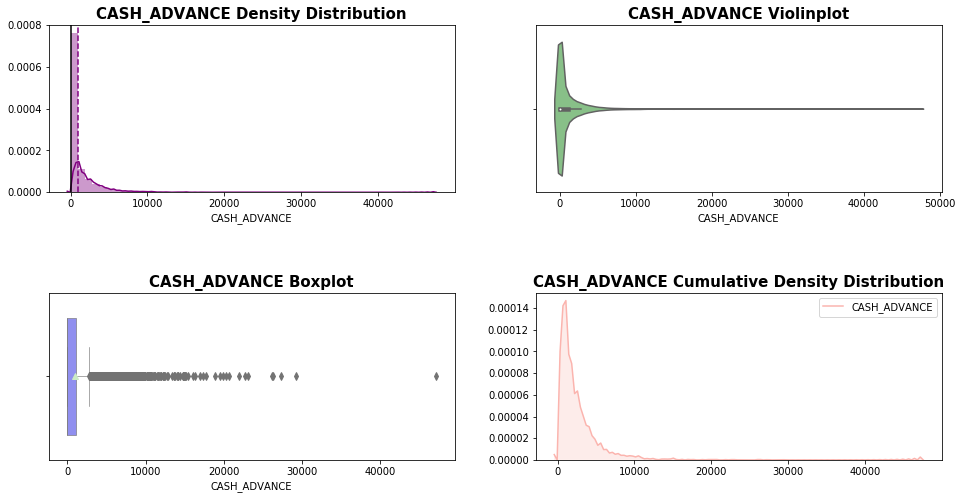

In [52]:
plot_group('CASH_ADVANCE')

In [53]:
## اغلب مبالغ پیش پرداخت بین ۰ تا ۱۰۰۰۰ بوده است
## میانگین مبالغ پیش پرداخت تقریبا ۹۹۴ بوده است

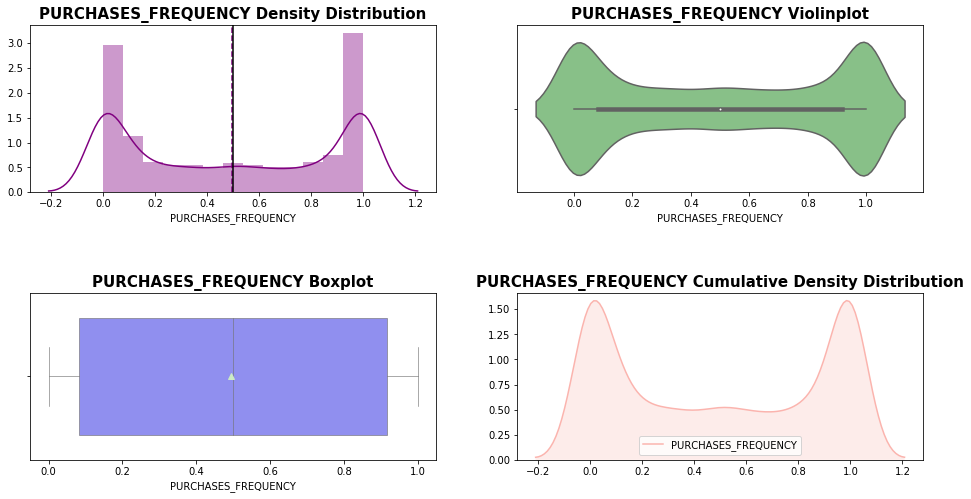

In [54]:
plot_group('PURCHASES_FREQUENCY')

In [55]:
## مشتریان این دیتاست اغلب به دفعات زیاد خرید میکنند یا به ندرت و سایرین بین این دو قله قرار میگیرند
## میانگین و میانه داده ها تقریبا ۰.۵ است و این یعنی داد ها به صورت متعادل توزیع شده اند

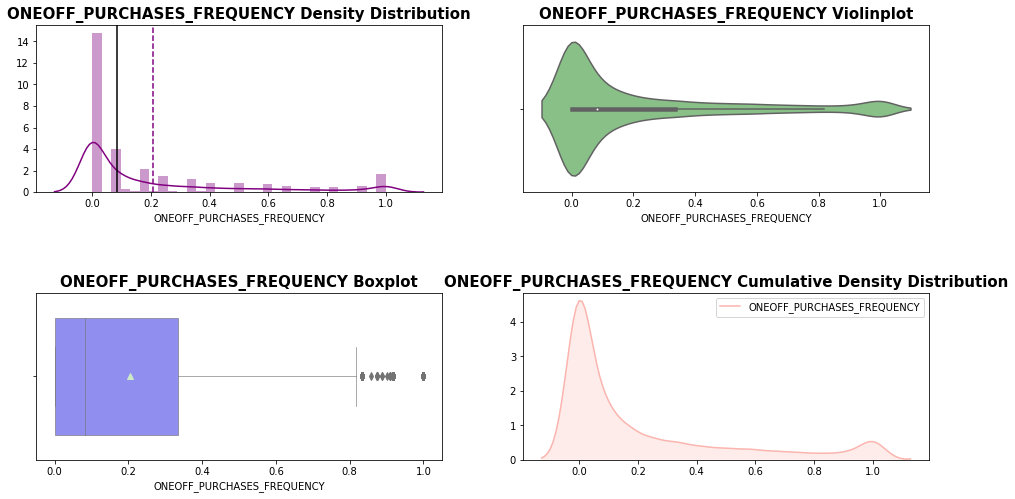

In [56]:
plot_group('ONEOFF_PURCHASES_FREQUENCY')

In [57]:
## اغلب مشتریان خرید های  یکباره را به ندرت میکنند
## میانگین ۰.۲ نیز بیانگیر همین مساله است

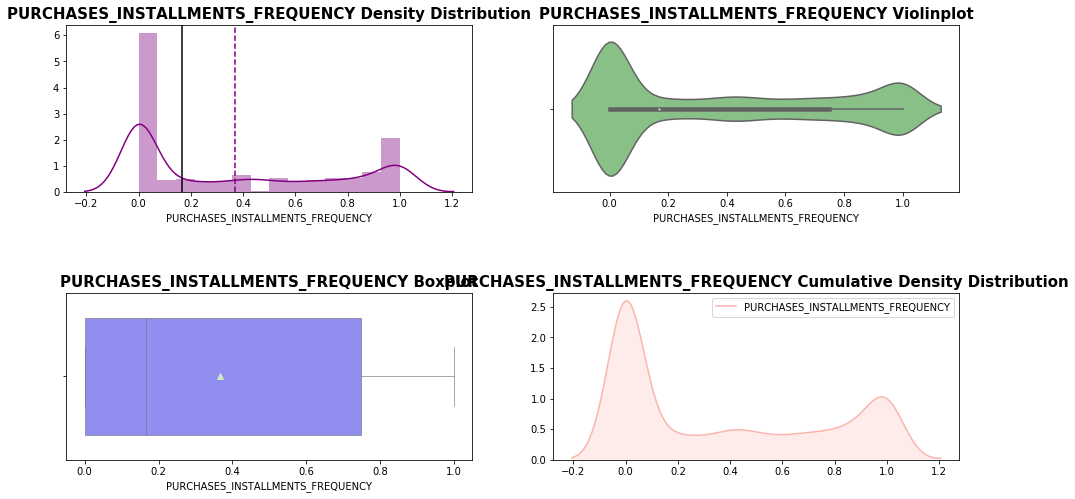

In [58]:
plot_group('PURCHASES_INSTALLMENTS_FREQUENCY')

In [59]:
## مشتریانی که زیاد خرید اقساطی انجام میدهند بیشتر از مشتریانی هستند که به صورت متعادل این کار را انجام میدهند و 
## کمتر از مشتریانی هستند که به ندرت این کار را انجام میدهند 
## بنابراین اکثر مشتریان به ندرت خرید های اقساطی انجام میدهند

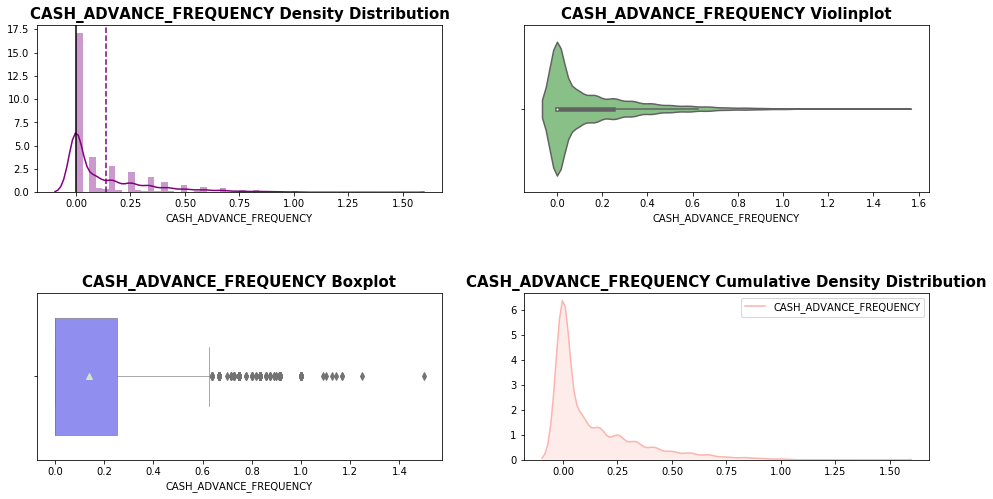

In [60]:
plot_group('CASH_ADVANCE_FREQUENCY')

In [61]:
## پیش پرداخت نقدی نیز به ندرت پرداخت میشود
## میانگین تقریبا ۰.۱۳ است

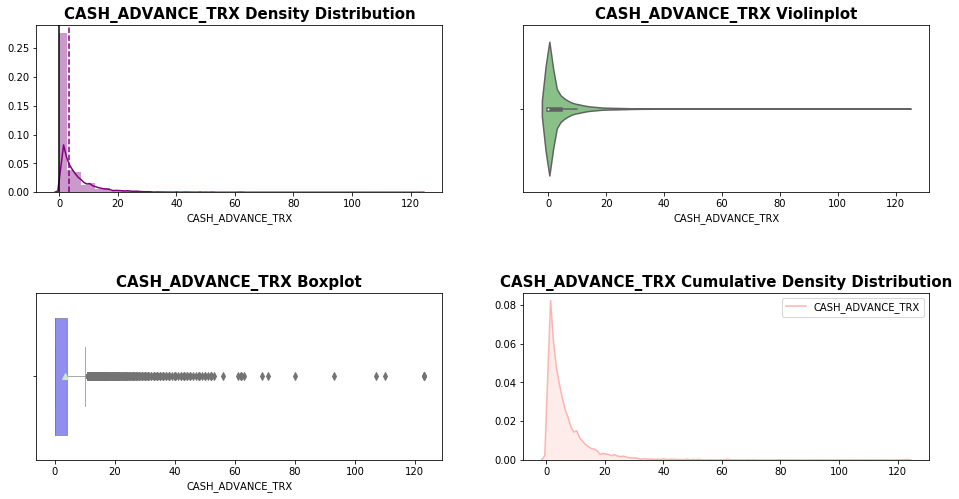

In [62]:
plot_group('CASH_ADVANCE_TRX')

In [63]:
## تعداد معاملاتی که با پیش پرداخت نقدی انجام شده است بین ۰ تا ۱۲۳ و با میانگین ۳.۳ بوده است
## بیشترن تراکم دیتاها بین ۰ تا ۱۰ معامله بوده است

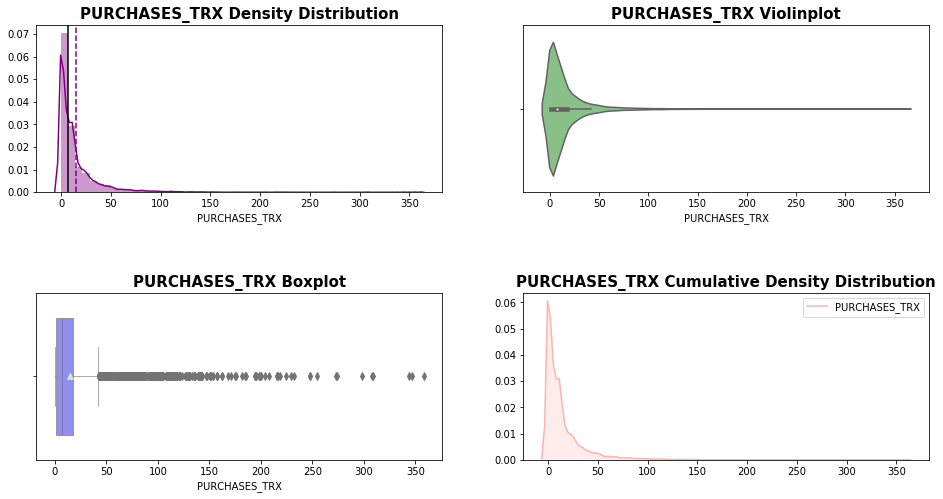

In [64]:
plot_group('PURCHASES_TRX')

In [65]:
## بیشتر معاملات خرید بین ۰ تا ۵۰ بوده است
## میانگین تعداد معادلات تقریبا ۱۵ بوده است

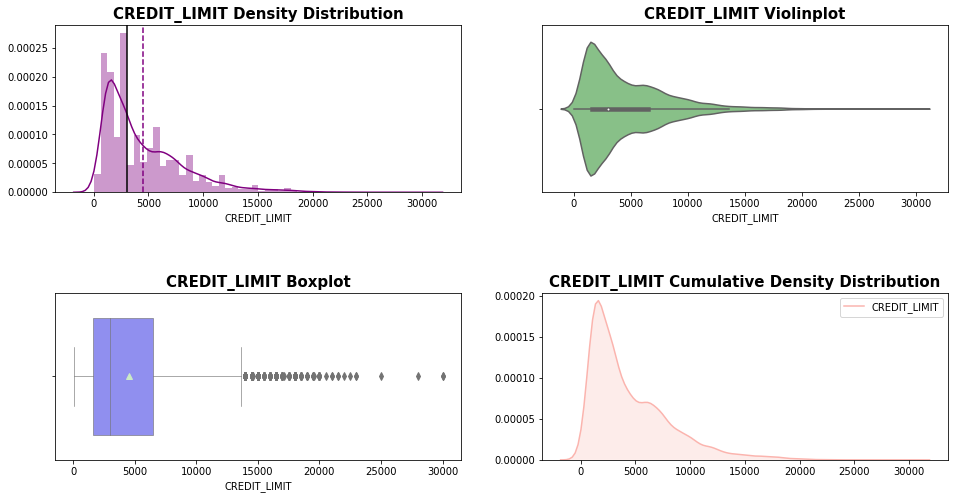

In [66]:
plot_group('CREDIT_LIMIT')

In [67]:
## محدودیت اعتبار برای اکثر مشتریان وجود دارد
## میانگین آن تقریبا ۴۵۱۶ است

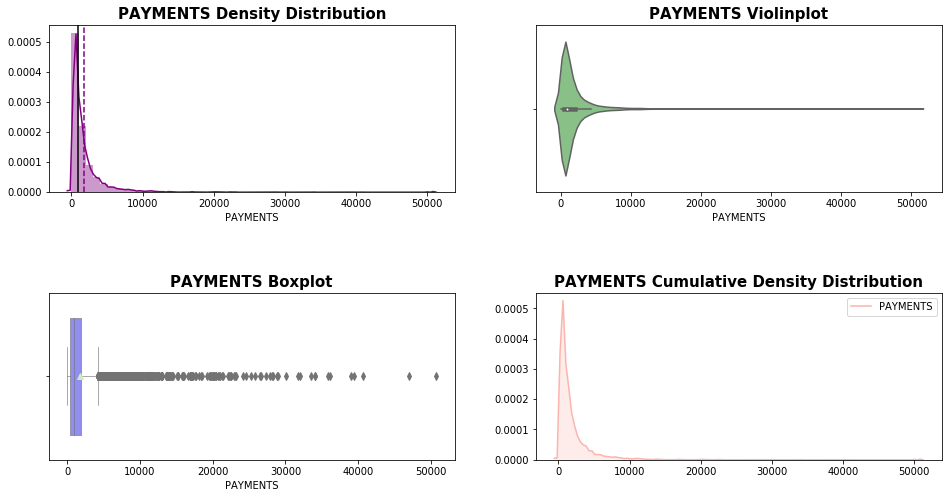

In [68]:
plot_group('PAYMENTS')

In [69]:
## بیشترین پرداخت ها بین ۰ تا ۵۰۰۰ بوده است
## میانگین مبالغ پرداختی ۱۷۸۱ بوده است

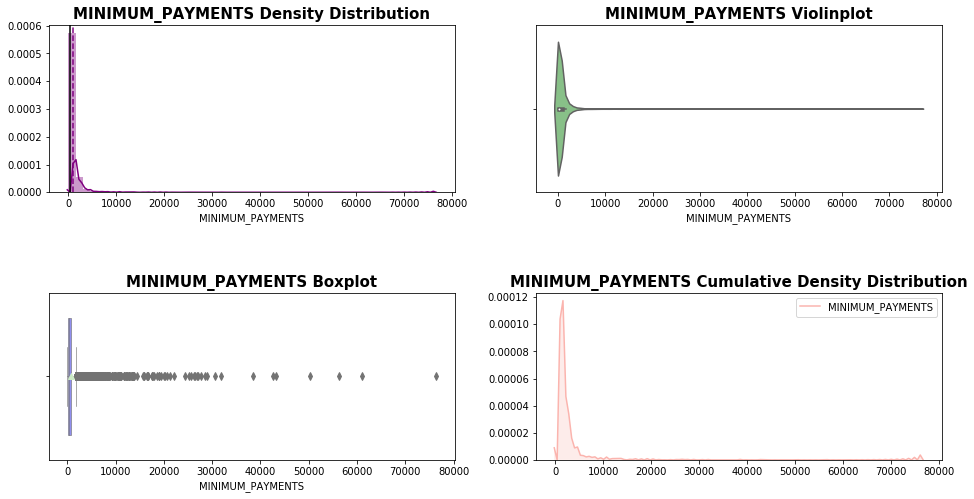

In [70]:
plot_group('MINIMUM_PAYMENTS')

In [71]:
## میانگین کمترین مبالغ پرداختی تقریبا ۸۶۴ بوده است

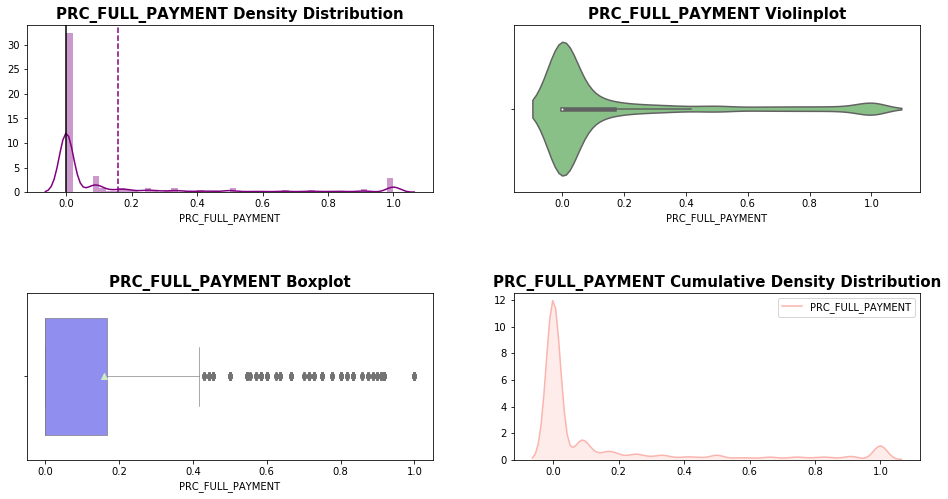

In [72]:
plot_group('PRC_FULL_PAYMENT')

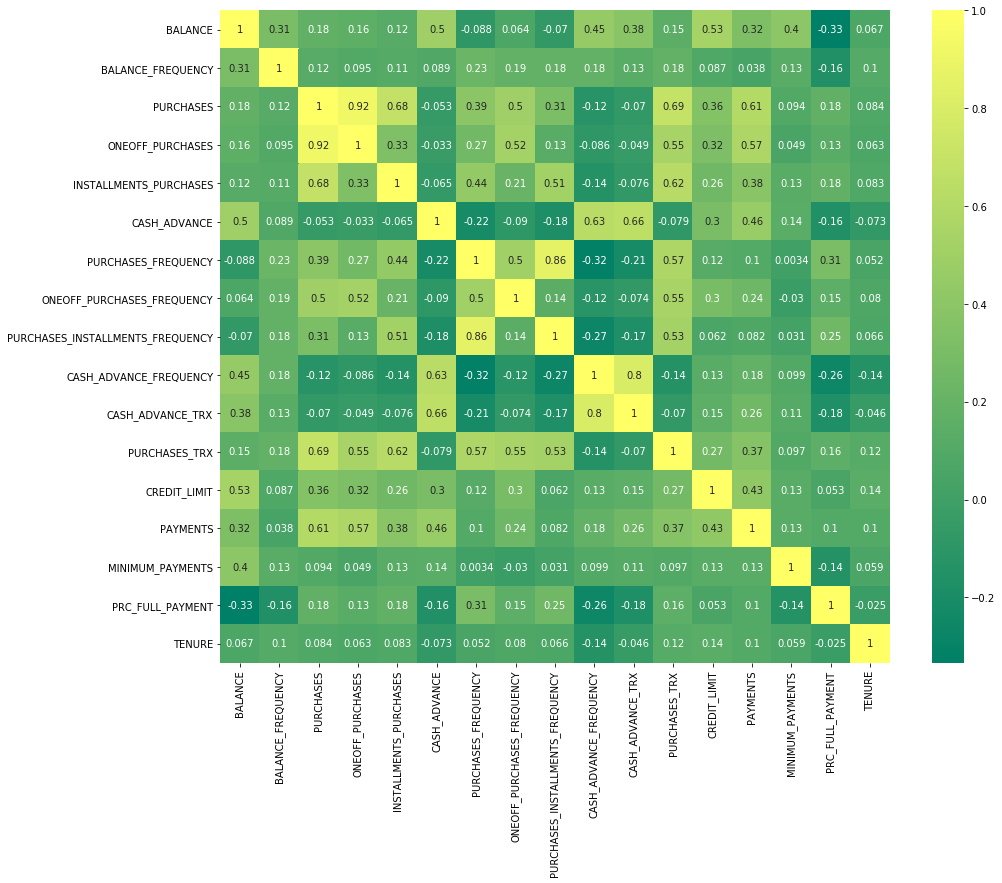

In [73]:
# Plotting correlation heatmap of the features
plt.figure(figsize=(15 , 12))
corr = df.corr()
sns.heatmap(corr[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']] ,annot=True,cmap='summer')             # heatmap of correlations
plt.show()

# Machine Learning Models

## 1_1) Kmeans Model

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',       ## Convert values of data to array  
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']].values
X[:5]

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, 0.00000000e+00,
        9.54000000e+01, 0.00000000e+00, 1.66667000e-01, 0.00000000e+00,
        8.33330000e-02, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.00000000e+03, 2.01802084e+02, 1.39509787e+02, 0.00000000e+00,
        1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.44294548e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.50000000e-01, 4.00000000e+00, 0.00000000e+00,
        7.00000000e+03, 4.10303260e+03, 1.07234022e+03, 2.22222000e-01,
        1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, 7.73170000e+02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20000000e+01,
        7.50000000e+03, 6.22066742e+02, 6.27284787e+02, 0.00000000e+00,
        1.20000000e+01],
       [8.17714335e+02, 1.00000000e+00, 1.60000000e+01, 1.600

In [76]:
scaler = StandardScaler()               # scaleing data
X = scaler.fit(X).transform(X)
X[:5]   

array([[-0.74439128, -0.36917457, -0.42806569, -0.35827602, -0.35430176,
        -0.46856813, -0.81958326, -0.68549214, -0.71554647, -0.68189136,
        -0.47947151, -0.51741699, -0.96191727, -0.54299988, -0.3052783 ,
        -0.53756597,  0.3553765 ],
       [ 0.7652676 ,  0.06833773, -0.47216861, -0.35827602, -0.45905849,
         2.56802518, -1.23492248, -0.68549214, -0.92506776,  0.55670495,
         0.09923805, -0.59730336,  0.67921834,  0.79839256,  0.08764034,
         0.21251311,  0.3553765 ],
       [ 0.42752058,  0.50585004, -0.11473619,  0.10076264, -0.45905849,
        -0.46856813,  1.25710784,  2.64963158, -0.92506776, -0.68189136,
        -0.47947151, -0.11798511,  0.81597964, -0.3984968 , -0.099822  ,
        -0.53756597,  0.3553765 ],
       [-0.37346014,  0.50585004, -0.46477189, -0.34877667, -0.45905849,
        -0.46856813, -1.02725412, -0.40756627, -0.92506776, -0.68189136,
        -0.47947151, -0.55736017, -0.90721275, -0.3791497 , -0.26093257,
        -0.53756597

In [77]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

In [78]:
silhouette_coeff = []
calinski_harabasz_coeff = []
davies_bouldin_coeff = []

def kmeans(X , n_clusters , inits , n_init):
    df_evaluation = pd.DataFrame()
    for k in n_clusters:
        for init in inits:
            for n in n_init:
                
                kmeans = KMeans(n_clusters=k , init = init , n_init = n)
                kmeans.fit(X)
                score = silhouette_score(X , kmeans.labels_)
                score2 = calinski_harabasz_score(X ,  kmeans.labels_)
                score3 = davies_bouldin_score(X ,  kmeans.labels_)
                silhouette_coeff.append(score)
                calinski_harabasz_coeff.append(score2)
                davies_bouldin_coeff.append(score3)
                dictt = {'n_cluster':k , 'init':init , 'n_init':n , 'silhouette_coeff':score , 
                         'calinski_harabasz_coeff':score2 , 'davies_bouldin_coeff':score3}
                df_evaluation = df_evaluation.append(dictt , ignore_index = True)
    return(df_evaluation)                    

In [79]:
n_clusters = range(2 , 11)
init = ['k-means++', 'random']
n_init = [10 , 15 , 20]
df_score = kmeans(X , n_clusters , init , n_init)

In [80]:
df_score            ## show the all parameters with their error coef and select the best

n_cluster       init  n_init  silhouette_coeff  calinski_harabasz_coeff  \
0         2.0  k-means++    10.0          0.209012              1643.564210   
1         2.0  k-means++    15.0          0.209001              1643.566562   
2         2.0  k-means++    20.0          0.209012              1643.564210   
3         2.0     random    10.0          0.209012              1643.564210   
4         2.0     random    15.0          0.207973              1643.578574   
5         2.0     random    20.0          0.207946              1643.577767   
6         3.0  k-means++    10.0          0.247957              1540.129369   
7         3.0  k-means++    15.0          0.247547              1540.109055   
8         3.0  k-means++    20.0          0.247453              1540.106648   
9         3.0     random    10.0          0.247453              1540.106648   
10        3.0     random    15.0          0.247071              1540.113114   
11        3.0     random    20.0          0.247589              1540.113934   
12        4.0  k-means++    10.0          0.197479              1534.154993   
13        4.0  k-means++    15.0          0.197504              1534.154184   
14        4.0  k-means++    20.0          0.199165              1534.186598   
15        4.0     random    10.0          0.199251              1534.183314   
16        4.0     random    15.0          0.197479              1534.154993   
17        4.0     random    20.0          0.197467              1534.154638   
18        5.0  k-means++    10.0          0.192869              1425.037644   
19        5.0  k-means++    15.0          0.192546              1425.038725   
20        5.0  k-means++    20.0          0.192390              1425.058130   
21        5.0     random    10.0          0.192869              1425.037644   
22        5.0     random    15.0          0.192600              1425.036839   
23        5.0     random    20.0          0.192869              1425.037644   
24        6.0  k-means++    10.0          0.208009              1373.118452   
25        6.0  k-means++    15.0          0.207290              1373.191588   
26        6.0  k-means++    20.0          0.207979              1373.125116   
27        6.0     random    10.0          0.207296              1373.189292   
28        6.0     random    15.0          0.206872              1373.106320   
29        6.0     random    20.0          0.208129              1373.108915   
30        7.0  k-means++    10.0          0.220544              1321.340986   
31        7.0  k-means++    15.0          0.220484              1321.341350   
32        7.0  k-means++    20.0          0.220601              1321.332705   
33        7.0     random    10.0          0.220305              1321.346444   
34        7.0     random    15.0          0.219796              1321.361330   
35        7.0     random    20.0          0.220420              1321.340639   
36        8.0  k-means++    10.0          0.227954              1292.518824   
37        8.0  k-means++    15.0          0.227404              1292.549988   
38        8.0  k-means++    20.0          0.227496              1292.571733   
39        8.0     random    10.0          0.211962              1253.644646   
40        8.0     random    15.0          0.217602              1265.654677   
41        8.0     random    20.0          0.227568              1288.723691   
42        9.0  k-means++    10.0          0.224427              1238.949591   
43        9.0  k-means++    15.0          0.231891              1275.138089   
44        9.0  k-means++    20.0          0.220985              1234.093449   
45        9.0     random    10.0          0.223103              1233.896830   
46        9.0     random    15.0          0.232110              1275.122815   
47        9.0     random    20.0          0.231755              1279.163040   
48       10.0  k-means++    10.0          0.229646              1245.036244   
49       10.0  k-means++    15.0          0.228944    

In [81]:
listt = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k , init = 'k-means++' , n_init = 15)
    kmeans.fit(X)
    listt.append(kmeans.inertia_)

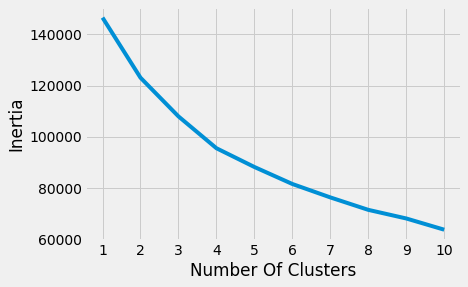

In [82]:
plt.style.use('fivethirtyeight')
plt.plot(range(1 , 11) , listt)
plt.xticks(range(1 , 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
## با توجه به نمودار بنظر میرسد که تعداد کلاستر ۴ مناسب ترین تعداد برای مدلسازی باشد 

In [84]:
listt = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k , init = 'random' , n_init = 15)
    kmeans.fit(X)
    listt.append(kmeans.inertia_)

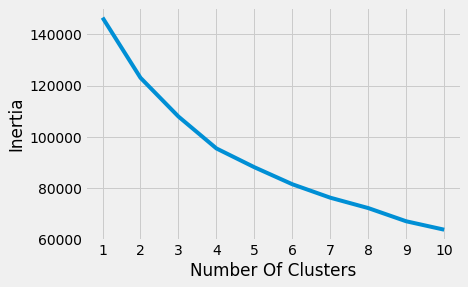

In [85]:
plt.style.use('fivethirtyeight')
plt.plot(range(1 , 11) , listt)
plt.xticks(range(1 , 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.show()

In [86]:
##    با تغییر مقدار اینیت  تفاوت چندانی بین اینرشیای هر کاستر ایجاد نمیشود و نقطه البو همان مقدار ۴ را نشان میدهد

In [87]:
from kneed import KneeLocator          ## show the elbow point

In [88]:
k1 = KneeLocator(range(1 , 11) , listt , curve = 'convex' , direction = 'decreasing')

In [90]:
k1.elbow

4

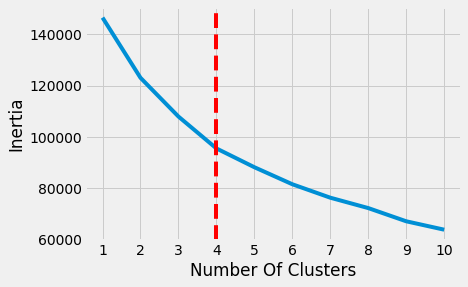

In [91]:
plt.style.use('fivethirtyeight')
plt.plot(range(1 , 11) , listt)
plt.xticks(range(1 , 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=k1.elbow , color = 'r' , label = 'axvline - full height' , ls = '--')
plt.show()

In [92]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 15)
k_means.fit(X)                                                      ## حال مدل را با تعداد کلاستر ۴ میسازیم

KMeans(n_clusters=4, n_init=15)

In [93]:
k_means_labels = k_means.labels_
k_means_labels              ## show the label of each data

array([2, 0, 1, ..., 1, 2, 2])

In [94]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers          ## show the center of each cluster

array([[ 1.4575677 ,  0.35687568, -0.24063334, -0.17040738, -0.25653158,
         1.69332702, -0.51439402, -0.22163615, -0.45714544,  1.73320881,
         1.61151203, -0.29185749,  0.85482662,  0.60860763,  0.49384886,
        -0.41826113, -0.11560361],
       [-0.32621376,  0.24696191,  0.11474096,  0.00519268,  0.26284694,
        -0.36524683,  0.97863499,  0.32277457,  0.87155485, -0.46514259,
        -0.36152558,  0.30231645, -0.06909731, -0.1379439 , -0.08877321,
         0.39003107,  0.05277092],
       [-0.2578024 , -0.36472866, -0.34514541, -0.23269042, -0.38931613,
        -0.18360405, -0.7973736 , -0.39119821, -0.71499433, -0.09264492,
        -0.16032351, -0.47677175, -0.3441592 , -0.26384477, -0.12265379,
        -0.25269508, -0.04217817],
       [ 0.95729863,  0.44558317,  3.16378271,  2.77018372,  2.3911879 ,
        -0.15198839,  1.12604336,  1.79647786,  1.04814096, -0.32383431,
        -0.16907275,  3.02777438,  1.43428281,  1.96101372,  0.48921593,
         0.44290178

In [95]:
df['TARGET'] = k_means_labels
df.head()                           ## add 'TARGET' feature to dataframe as kmeans labels

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  TARGET  
0   201.802084        139.509787          0.000000      12       2  
1  4103.032597       1072.340217          0.222222      12       0  
2   622.066742        627.284787          0.000000      12       1  
4   678.334763        244.791237          0.000000      12       2  
5  1400.057770       2407.246035          0.000000      12       1

In [96]:
df['constant'] = 'constant'         ## add this feature to plot stripplot

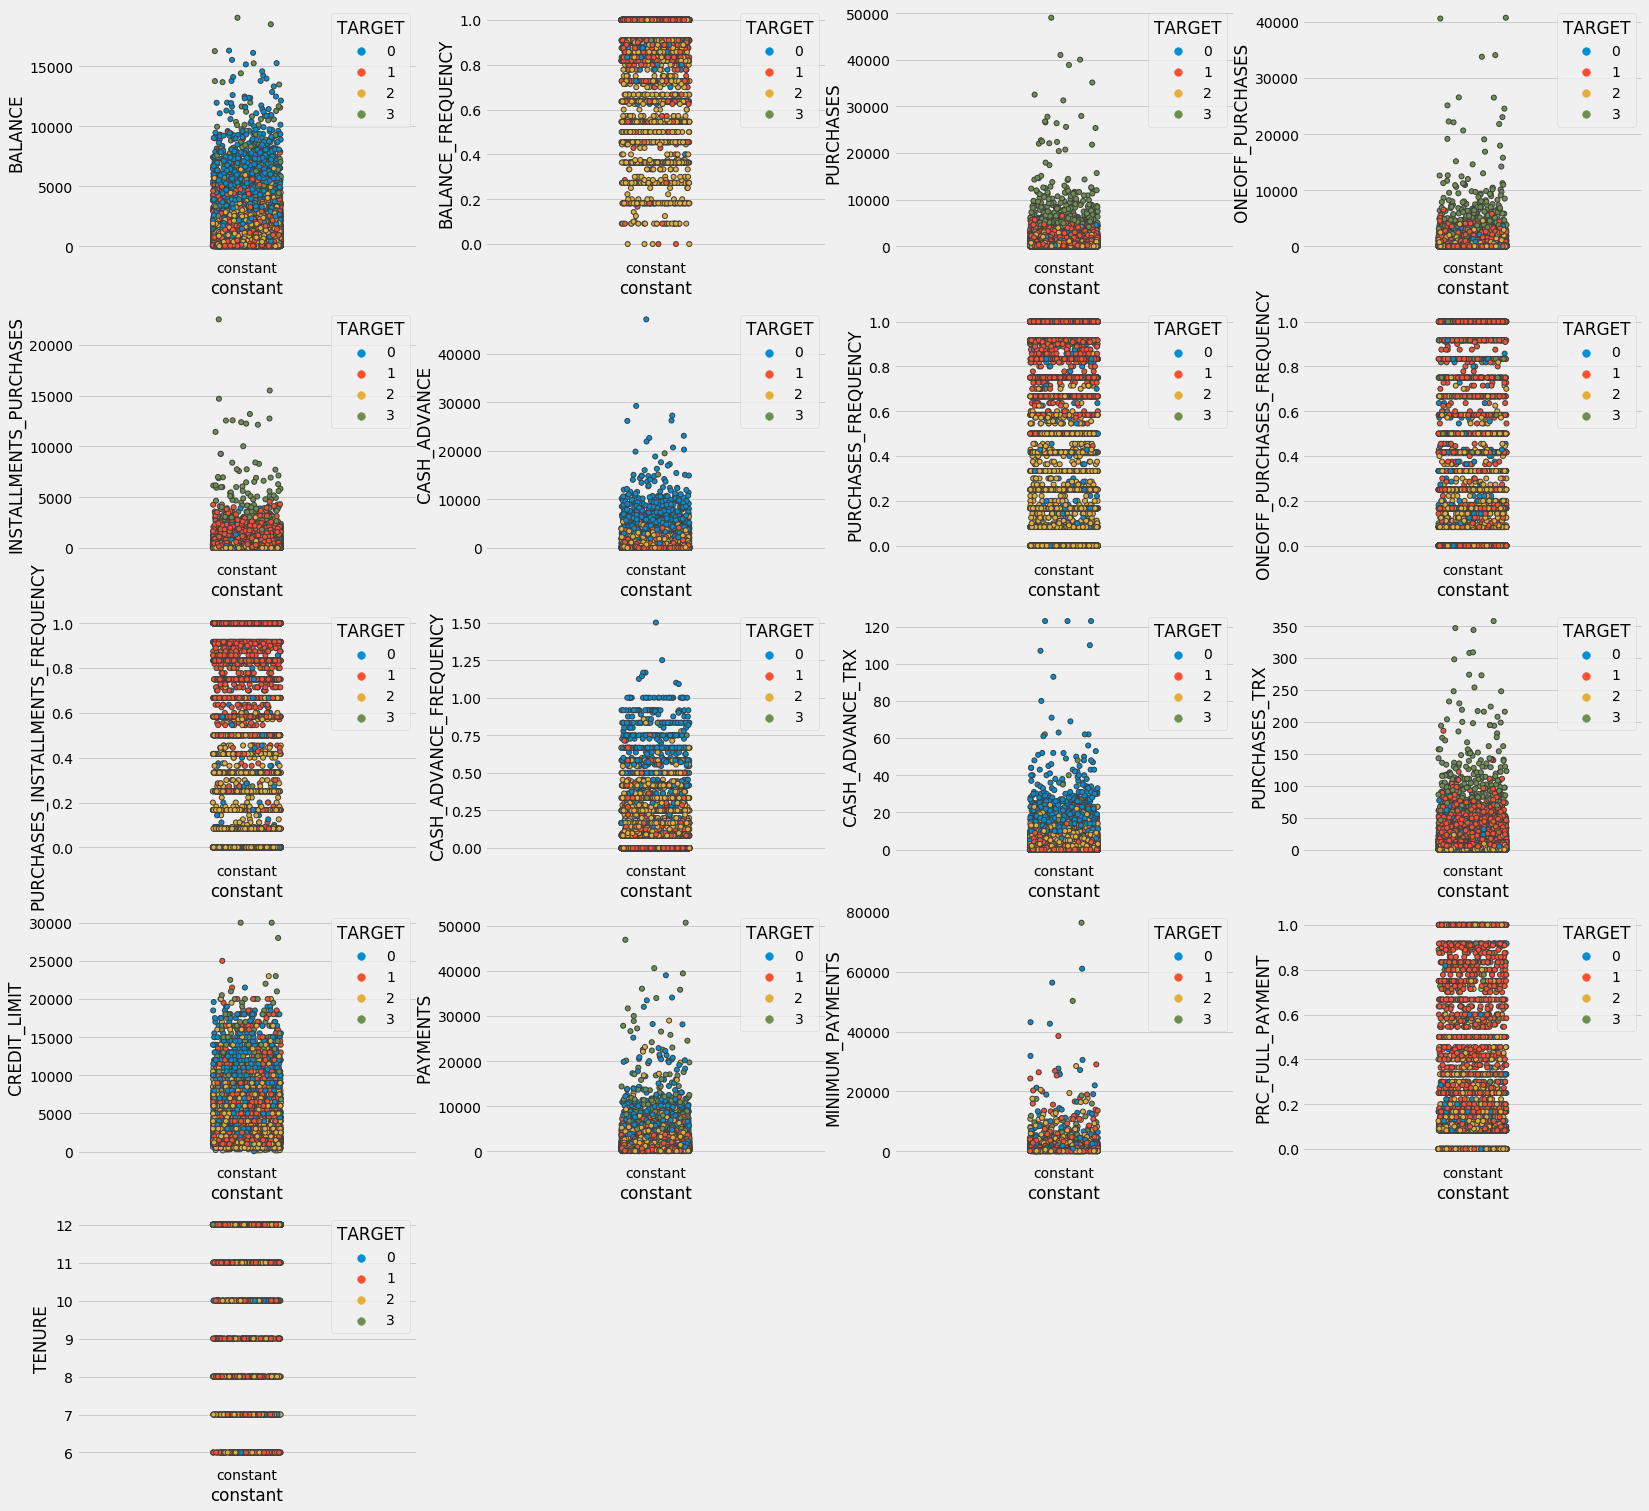

In [97]:
plt.figure(figsize=(25 , 25))

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['TARGET'] , linewidth=1)
    plt.xlabel('constant')

plt.show()

In [98]:
df['TARGET'].value_counts()

2    3813
1    3268
0    1153
3     385
Name: TARGET, dtype: int64

In [99]:
## kmeans select for us 4 clusters

## 1_2) Clustring With GMM

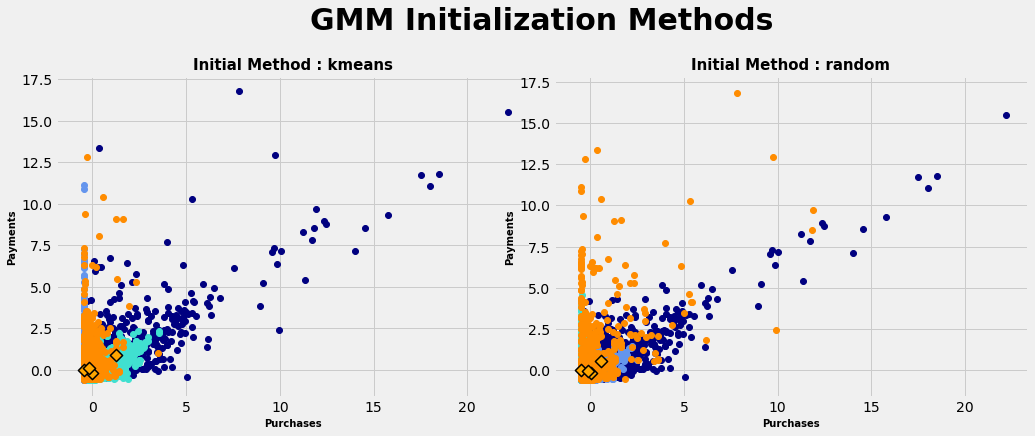

In [100]:
from sklearn.mixture import GaussianMixture


def get_initial_means(X, init_params, r):
    # Run a GaussianMixture 
    gmm = GaussianMixture(n_components=4, init_params=init_params , random_state=r).fit(X)
    return gmm.means_


methods = ['kmeans', 'random']
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]

plt.figure(figsize=(15, 12))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = 42
    plt.subplot(2, 2 , n+1)

    ini = get_initial_means(X, method, r)

    gmm = GaussianMixture(n_components=4, means_init=ini, max_iter=2000, random_state=r).fit(X)

    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 2], data[:, 13], color=color, marker="o" , linewidth=1)
        plt.xlabel('Purchases' , fontsize = 10 , fontweight='bold')
        plt.ylabel('Payments' , fontsize = 10 , fontweight='bold')
        plt.title(f'Initial Method : {method}' ,  fontsize = 15 , fontweight='bold')
    plt.scatter(ini[:, 2], ini[:, 13], s=75, marker="D", c="orange", lw=1.5, edgecolors="black")
    


plt.suptitle("GMM Initialization Methods" , fontsize = 30 , fontweight='bold')
plt.show()

## 2) Mini Batch Kmeans Model

In [101]:
from sklearn.cluster import MiniBatchKMeans
silhouette_coeff = []
calinski_harabasz_coeff = []
davies_bouldin_coeff = []

def mini_batch_kmeans(X , n_clusters , inits , n_init):
    df_evaluation = pd.DataFrame()
    for k in n_clusters:
        for init in inits:
            for n in n_init:
                
                kmeans = MiniBatchKMeans(n_clusters=k , init = init , n_init = n , random_state = 10)
                kmeans.fit(X)
                score = silhouette_score(X , kmeans.labels_)
                score2 = calinski_harabasz_score(X ,  kmeans.labels_)
                score3 = davies_bouldin_score(X ,  kmeans.labels_)
                silhouette_coeff.append(score)
                calinski_harabasz_coeff.append(score2)
                davies_bouldin_coeff.append(score3)
                dictt = {'n_cluster':k , 'init':init , 'n_init':n , 'silhouette_coeff':score , 
                         'calinski_harabasz_coeff':score2 , 'davies_bouldin_coeff':score3}
                df_evaluation = df_evaluation.append(dictt , ignore_index = True)
    return(df_evaluation)     

In [102]:
n_clusters = range(2 , 11)
init = ['k-means++', 'random']
n_init = [10 , 15 , 20]
df_score = mini_batch_kmeans(X , n_clusters , init , n_init)
df_score      ## show the all parameters with their error coef and select the best

n_cluster       init  n_init  silhouette_coeff  calinski_harabasz_coeff  \
0         2.0  k-means++    10.0          0.174616              1440.374093   
1         2.0  k-means++    15.0          0.329772              1506.576599   
2         2.0  k-means++    20.0          0.205284              1641.186602   
3         2.0     random    10.0          0.205714              1641.783115   
4         2.0     random    15.0          0.207188              1643.199813   
5         2.0     random    20.0          0.205344              1641.597054   
6         3.0  k-means++    10.0          0.206417              1492.963799   
7         3.0  k-means++    15.0          0.207661              1493.369597   
8         3.0  k-means++    20.0          0.195998              1491.559027   
9         3.0     random    10.0          0.200758              1503.825261   
10        3.0     random    15.0          0.199760              1503.881854   
11        3.0     random    20.0          0.207669              1499.071015   
12        4.0  k-means++    10.0          0.181177              1483.686960   
13        4.0  k-means++    15.0          0.184391              1491.299763   
14        4.0  k-means++    20.0          0.179658              1321.743195   
15        4.0     random    10.0          0.209386              1236.844364   
16        4.0     random    15.0          0.210293              1231.464522   
17        4.0     random    20.0          0.208673              1238.632822   
18        5.0  k-means++    10.0          0.185435              1326.278702   
19        5.0  k-means++    15.0          0.181410              1333.867414   
20        5.0  k-means++    20.0          0.190847              1413.243881   
21        5.0     random    10.0          0.194104              1069.480862   
22        5.0     random    15.0          0.209871              1340.095617   
23        5.0     random    20.0          0.202123              1151.147225   
24        6.0  k-means++    10.0          0.154297              1184.331140   
25        6.0  k-means++    15.0          0.159100              1184.201884   
26        6.0  k-means++    20.0          0.178140              1223.934214   
27        6.0     random    10.0          0.177339              1028.835679   
28        6.0     random    15.0          0.189342              1115.574335   
29        6.0     random    20.0          0.209779              1343.112337   
30        7.0  k-means++    10.0          0.117491              1111.756798   
31        7.0  k-means++    15.0          0.113712              1093.920701   
32        7.0  k-means++    20.0          0.126871              1044.539332   
33        7.0     random    10.0          0.187715              1163.768091   
34        7.0     random    15.0          0.190419              1166.931871   
35        7.0     random    20.0          0.180191              1226.587808   
36        8.0  k-means++    10.0          0.216460              1179.390732   
37        8.0  k-means++    15.0          0.171245              1166.474637   
38        8.0  k-means++    20.0          0.178729              1157.638305   
39        8.0     random    10.0          0.139021              1046.314838   
40        8.0     random    15.0          0.143726              1044.427129   
41        8.0     random    20.0          0.146487              1051.805810   
42        9.0  k-means++    10.0          0.221245              1168.865272   
43        9.0  k-means++    15.0          0.218405              1177.766764   
44        9.0  k-means++    20.0          0.220333              1169.023243   
45        9.0     random    10.0          0.138969              1096.006085   
46        9.0     random    15.0          0.152405              1094.339507   
47        9.0     random    20.0          0.138122              1105.252846   
48       10.0  k-means++    10.0          0.197316              1111.497747   
49       10.0  k-means++    15.0          0.203380    

In [103]:
listt = []
for k in range(2 , 11):
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k , init = 'k-means++' , n_init = 20 , random_state = 10)
    mini_batch_kmeans.fit(X)
    listt.append(mini_batch_kmeans.inertia_)

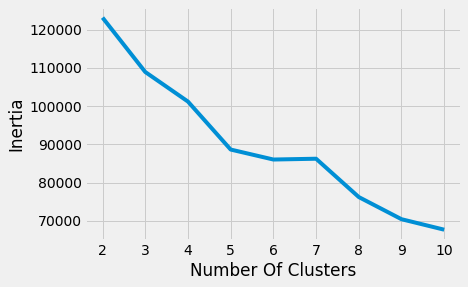

In [104]:
plt.style.use('fivethirtyeight')
plt.plot(range(2 , 11) , listt)
plt.xticks(range(2 , 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.show()

In [105]:
k1 = KneeLocator(range(2 , 11) , listt , curve = 'convex' , direction = 'decreasing')
k1.elbow

5

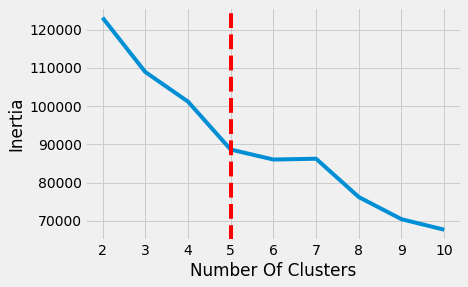

In [106]:
plt.style.use('fivethirtyeight')
plt.plot(range(2 , 11) , listt)
plt.xticks(range(2 , 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=k1.elbow , color = 'r' , label = 'axvline - full height' , ls = '--')
plt.show()

In [107]:
## با توجه به نمودار بنظر میرسد که تعداد کلاستر 5 مناسب ترین تعداد برای مدلسازی باشد 

In [108]:
mini_batch_kmeans = MiniBatchKMeans(init = "k-means++", n_clusters = 5, n_init = 20 , random_state = 10)
mini_batch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=20, random_state=10)

In [109]:
mini_batch_kmeans_labels = mini_batch_kmeans.labels_
mini_batch_kmeans_labels                    ## show the label of each data

array([0, 2, 4, ..., 1, 0, 0])

In [110]:
mini_batch_kmeans_cluster_centers = mini_batch_kmeans.cluster_centers_
mini_batch_kmeans_cluster_centers                        ## show the center of each cluster

array([[-2.79922657e-01, -3.79076004e-01, -3.33762335e-01,
        -2.14861847e-01, -3.95308222e-01, -2.29316004e-01,
        -7.95417953e-01, -3.43685958e-01, -7.41084844e-01,
        -1.84221873e-01, -2.21093000e-01, -4.69213985e-01,
        -3.20665287e-01, -2.65936213e-01, -1.37388412e-01,
        -2.43366141e-01, -1.68303262e-03],
       [-4.62275060e-01,  1.55756806e-01, -1.08594482e-01,
        -2.64660823e-01,  2.31724035e-01, -3.86103998e-01,
         9.35296850e-01, -4.12599574e-01,  1.11263821e+00,
        -4.95419139e-01, -3.80371051e-01,  7.47720648e-02,
        -3.63648413e-01, -2.92692728e-01, -1.01149870e-01,
         4.07507176e-01, -6.71442422e-02],
       [ 1.24316124e+00,  3.43047296e-01, -2.79787048e-01,
        -2.03381432e-01, -2.88532394e-01,  1.48720855e+00,
        -6.18513864e-01, -2.96938598e-01, -5.30207364e-01,
         1.62083434e+00,  1.41463310e+00, -3.47837084e-01,
         6.42535308e-01,  5.00415812e-01,  3.97819551e-01,
        -4.19661600e-01, -1.5

In [111]:
df['TARGET2'] = mini_batch_kmeans_labels
df.head()                    ## add new feature 'TARGET2' as mini batch kmeans label

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  TARGET  constant  \
0   201.802084        139.509787          0.000000      12       2  constant   
1  4103.032597       1072.340217          0.222222      12       0  constant   
2   622.066742        627.284787          0.000000      12       1  constant   
4   678.334763        244.791237          0.000000      12       2  constant   
5  1400.057770       2407.246035          0.000000      12       1  constant   

   TARGET2  
0        0  
1        2  
2        4  
4        0  
5        1

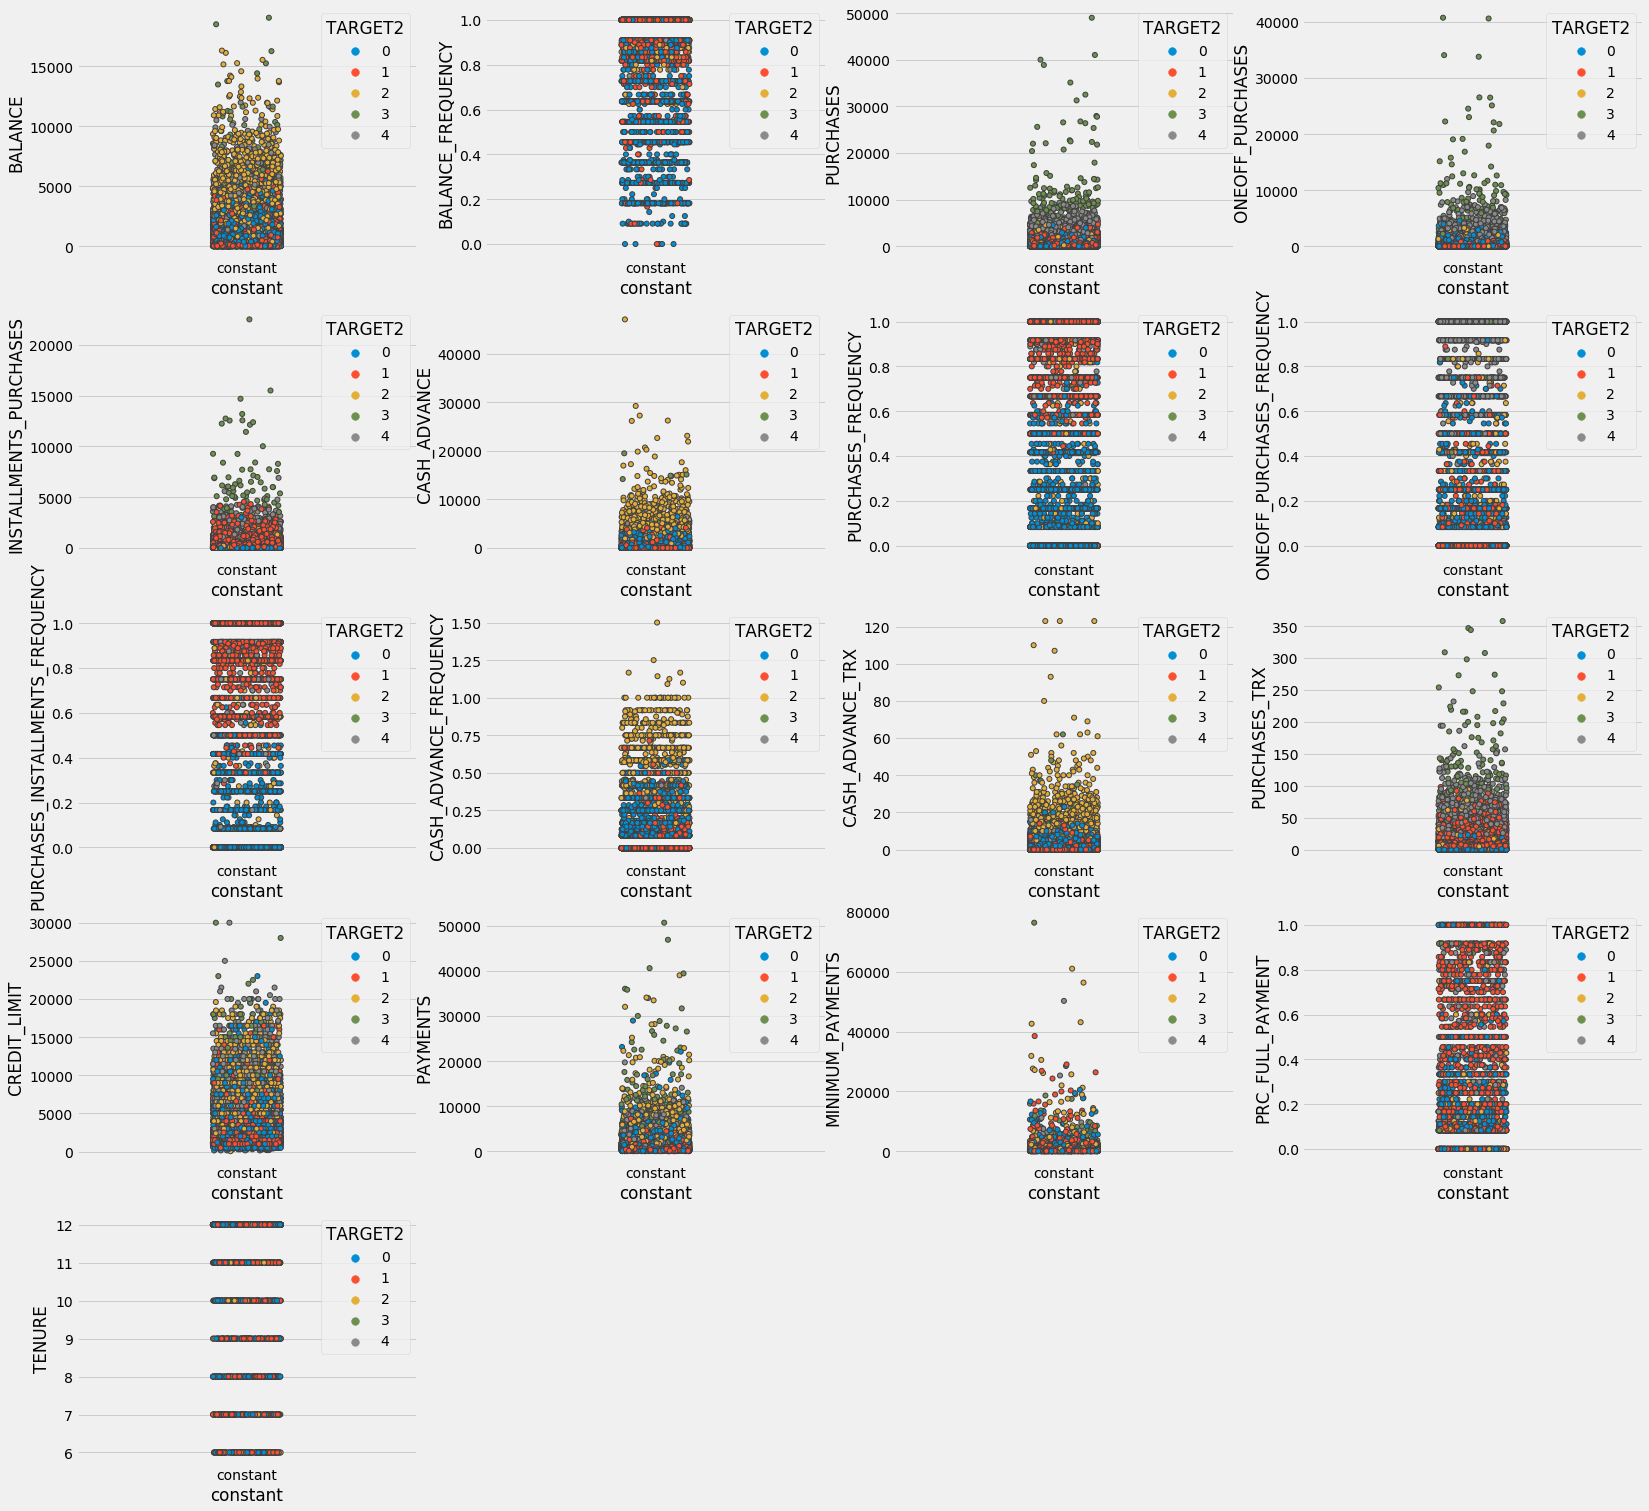

In [112]:
plt.figure(figsize=(25 , 25))

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['TARGET2'] , linewidth=1)
    plt.xlabel('constant')

plt.show()

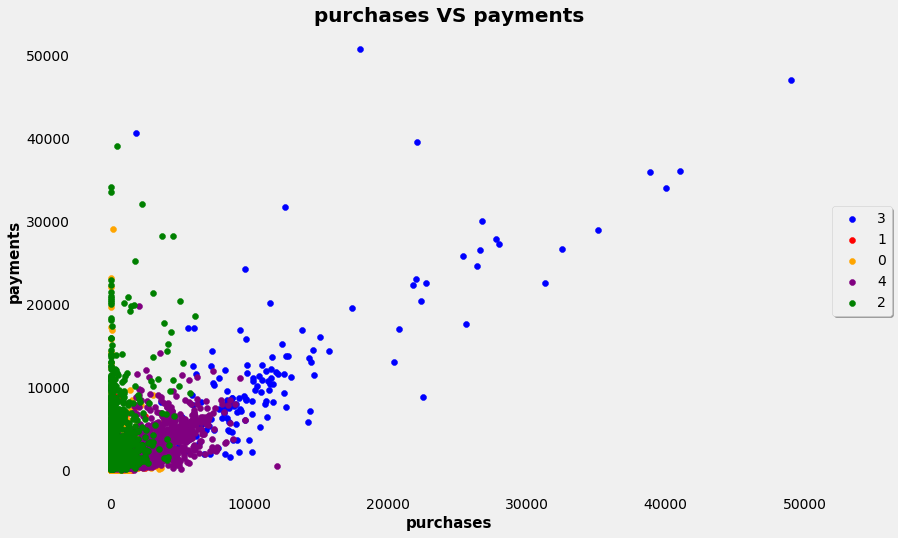

In [113]:
 # this code plot the values of 'PURCHASES' & 'PAYMENTS' with 'TARGET2' label

plt.figure(figsize=(12 , 8))
colors = ('blue' , 'red' , 'orange' , 'purple' , 'green')
labels = ('3', '1', '0', '4', '2')
for color , i , target in zip(colors , [3, 1, 0, 4, 2] , labels):
    plt.scatter(df[df['TARGET2'] == i]['PURCHASES'] , df[df['TARGET2'] == i]['PAYMENTS'] , 
                color = color , label = target , alpha=1)
plt.xlabel('purchases' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('payments', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('purchases VS payments' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) , shadow=True)
plt.grid()              # Tabulation chart
plt.show()    

In [114]:
df['TARGET2'].value_counts()

0    3613
1    2209
4    1359
2    1293
3     145
Name: TARGET2, dtype: int64

In [115]:
## همانطور که مشخص است مدل دیتای مارا به ۵ کلاستر جدا کرده است

## 3) Mean Shift Model

In [116]:
from sklearn.cluster import MeanShift
# The following bandwidth can be automatically detected using

ms = MeanShift(bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 45


In [117]:
## انتخاب تعداد کلاستر ها برای کلاسترینگ در این الگوریتم خودکار انجام میشود و با توجه به بالا بودن تعداد کلاستر ها میتوان نتیجه گرفت این الگوریتم
## مناسب مدلسازی این دیتاست نیست

## 4) Hierarchical clustering

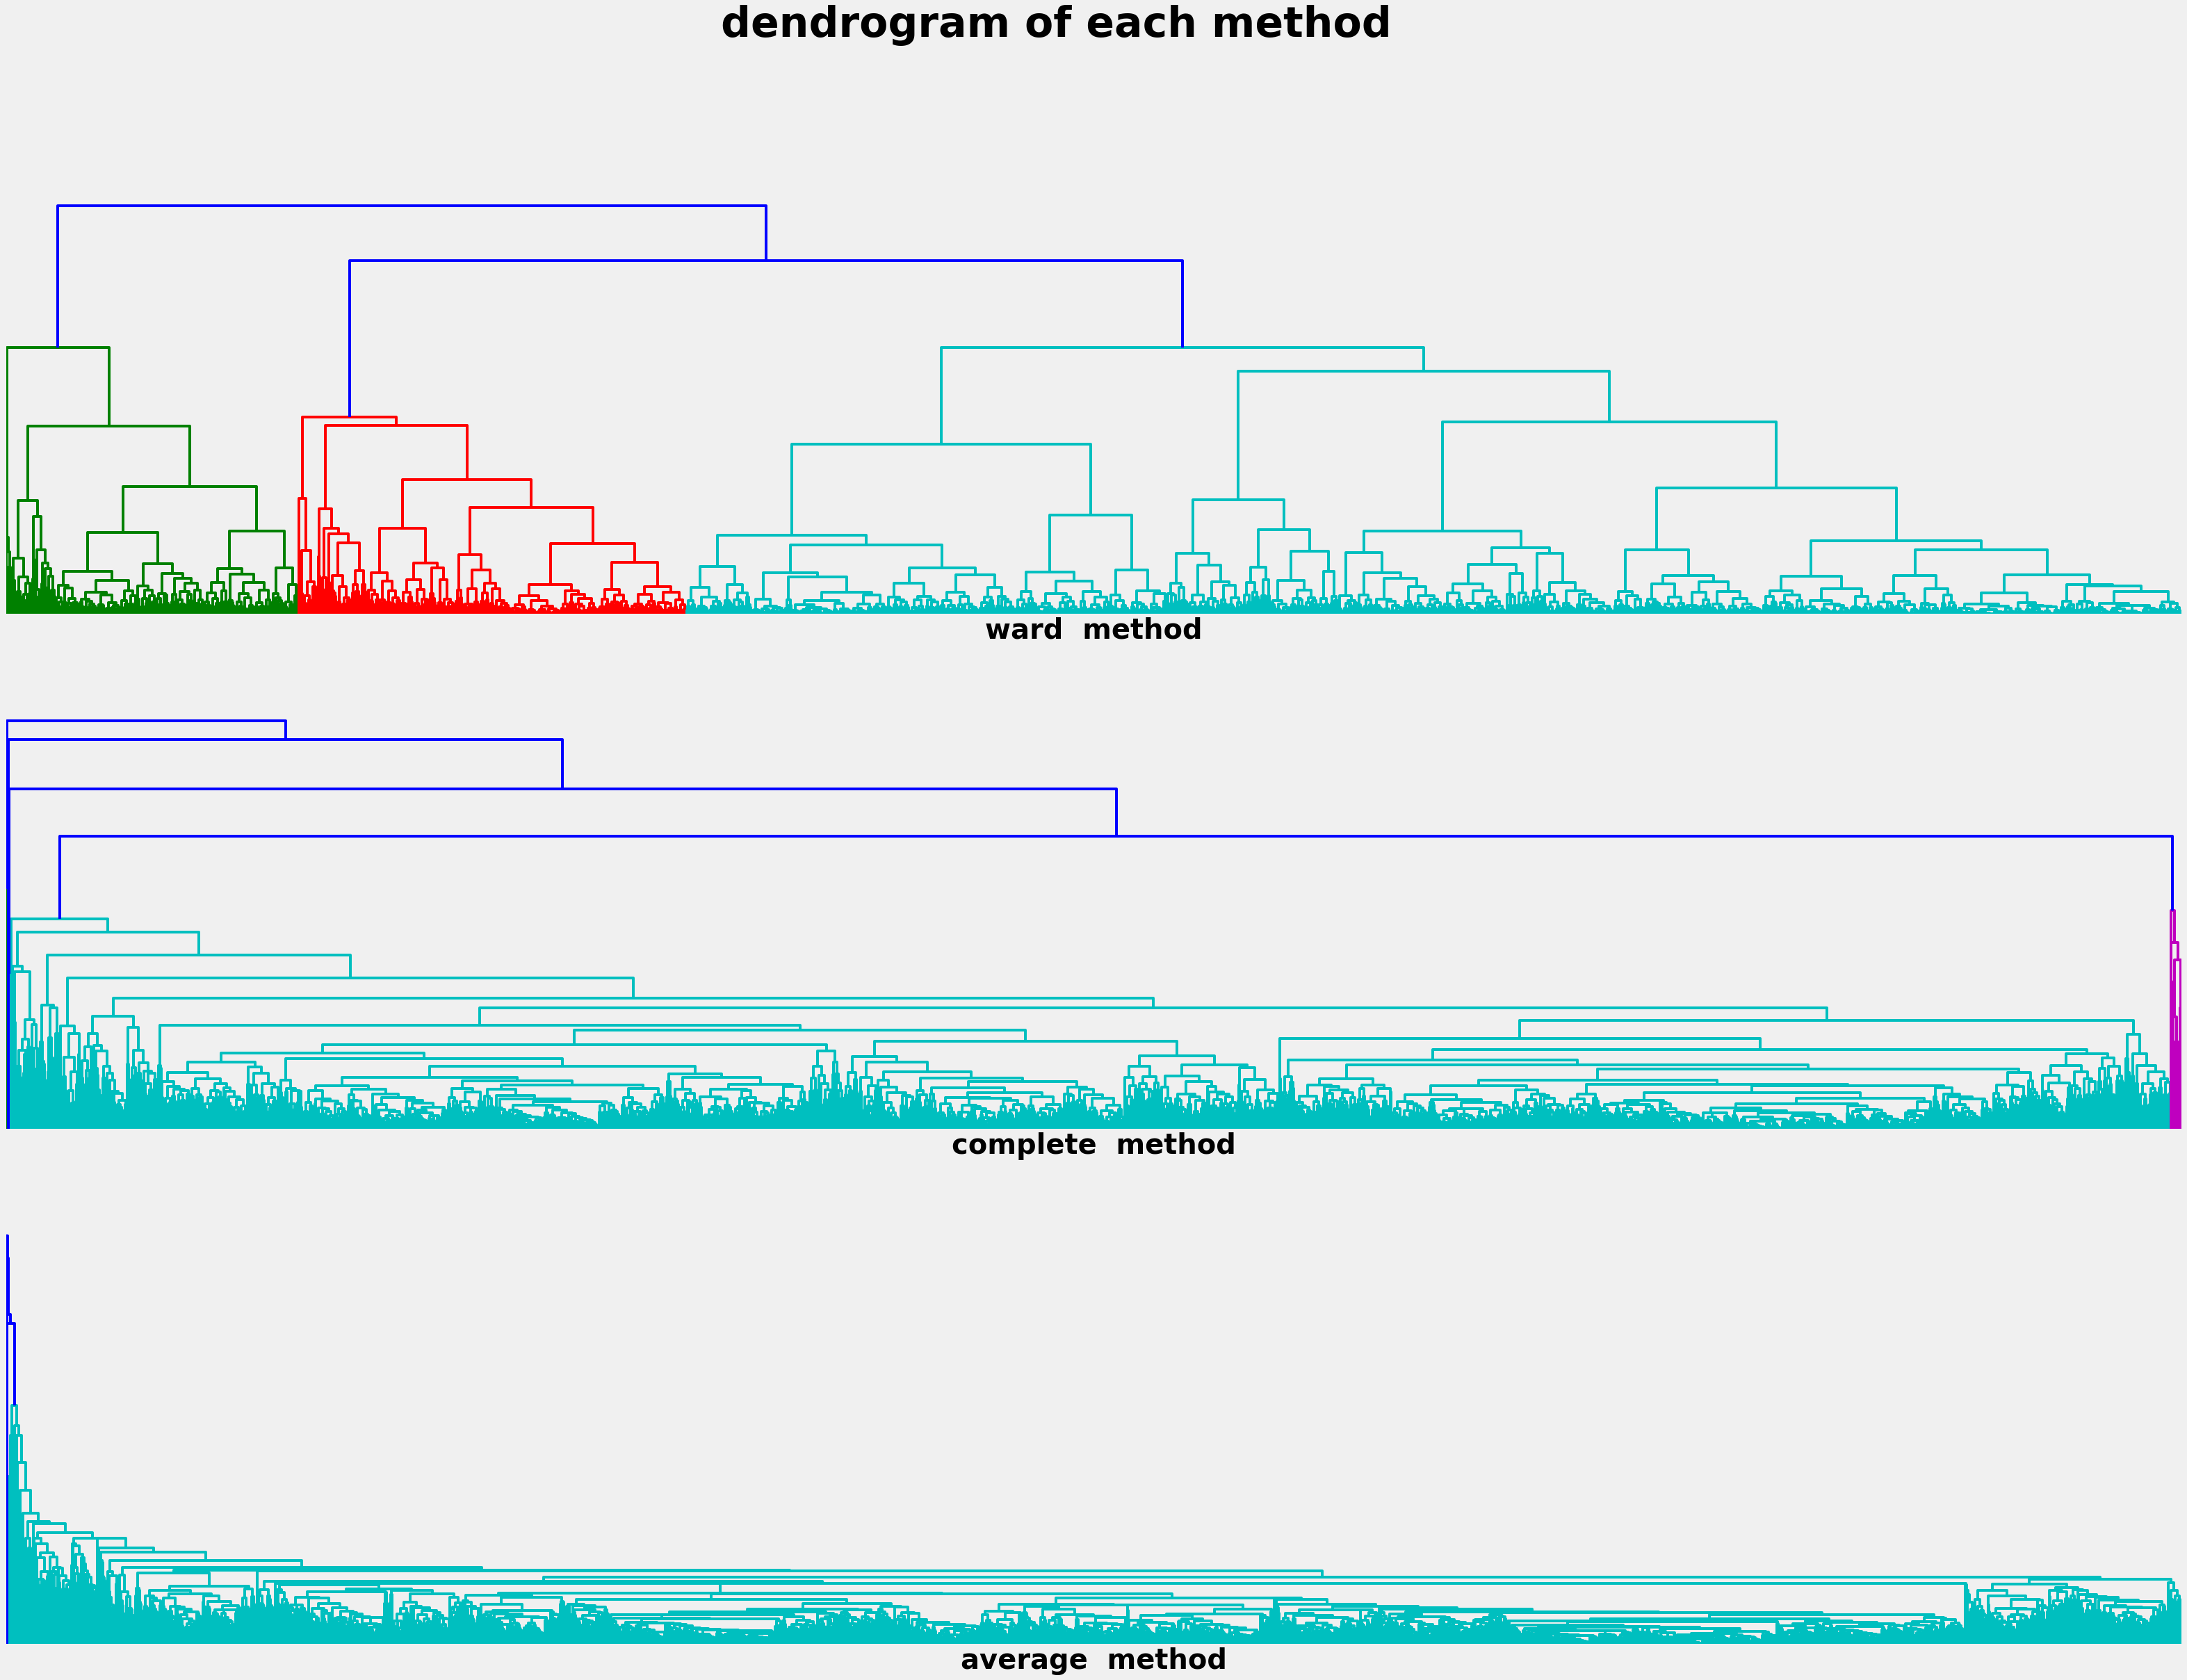

In [118]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

#plotting dendogram
methods = ['ward' , 'complete' , 'average']
plt.figure(figsize=(50, 36))
for i , method in enumerate(methods):
    plt.subplot(3 , 1 , i + 1)
    hcluster.dendrogram(hcluster.linkage(X,method=method))
    plt.xlabel(f'{method}  method' ,  fontsize = 40 , fontweight ='bold')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('dendrogram of each method' , fontsize = 60 , fontweight ='bold')
plt.show()

In [119]:
## با توجه به نمودارها مشخص است که بهترین متود برای کار با این الگوریتم 'ward است'
## همچنین تعداد کلاسترهای مناسب ۳ تاست

In [120]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(X)
hcluster_label = hcluster.labels_

In [121]:
#adding Target3 labels in hcluster_df
df['TARGET3'] = hcluster_label
#first few rows of hcluster_df
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                    0.00  ...              2        1000.0   201.802084   
1                    0.25  ...              0        7000.0  4103.032597   
2                    0.00  ...             12        7500.0   622.066742   
4                    0.00  ...              1        1200.0   678.334763   
5                    0.00  ...              8        1800.0  1400.057770   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  TARGET  constant TARGET2  \
0        139.509787          0.000000      12       2  constant       0   
1       1072.340217          0.222222      12       0  constant       2   
2        627.284787          0.000000      12       1  constant       4   
4        244.791237          0.000000      12       2  constant       0   
5       2407.246035          0.000000      12       1  constant       1   

   TARGET3  
0        1  
1        2  
2        1  
4        1  
5        1  

[5 rows x 21 columns]

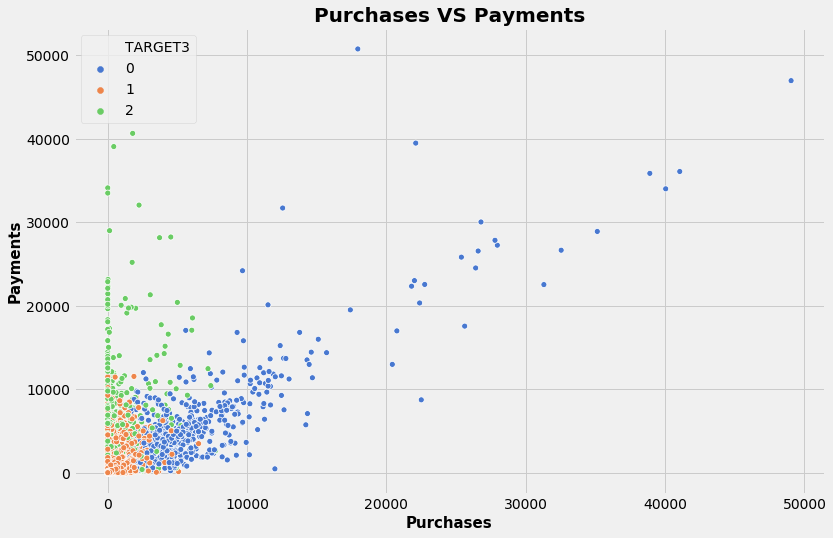

In [122]:
#visulazing hcluster results
plt.figure(figsize = (12 , 8))
sns.scatterplot(df['PURCHASES'],df['PAYMENTS'],hue='TARGET3',data=df , palette="muted")
plt.title("Purchases VS Payments", fontsize=20 , fontweight='bold')
plt.xlabel("Purchases", fontsize=15 , fontweight = 'bold')
plt.ylabel("Payments", fontsize=15 , fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

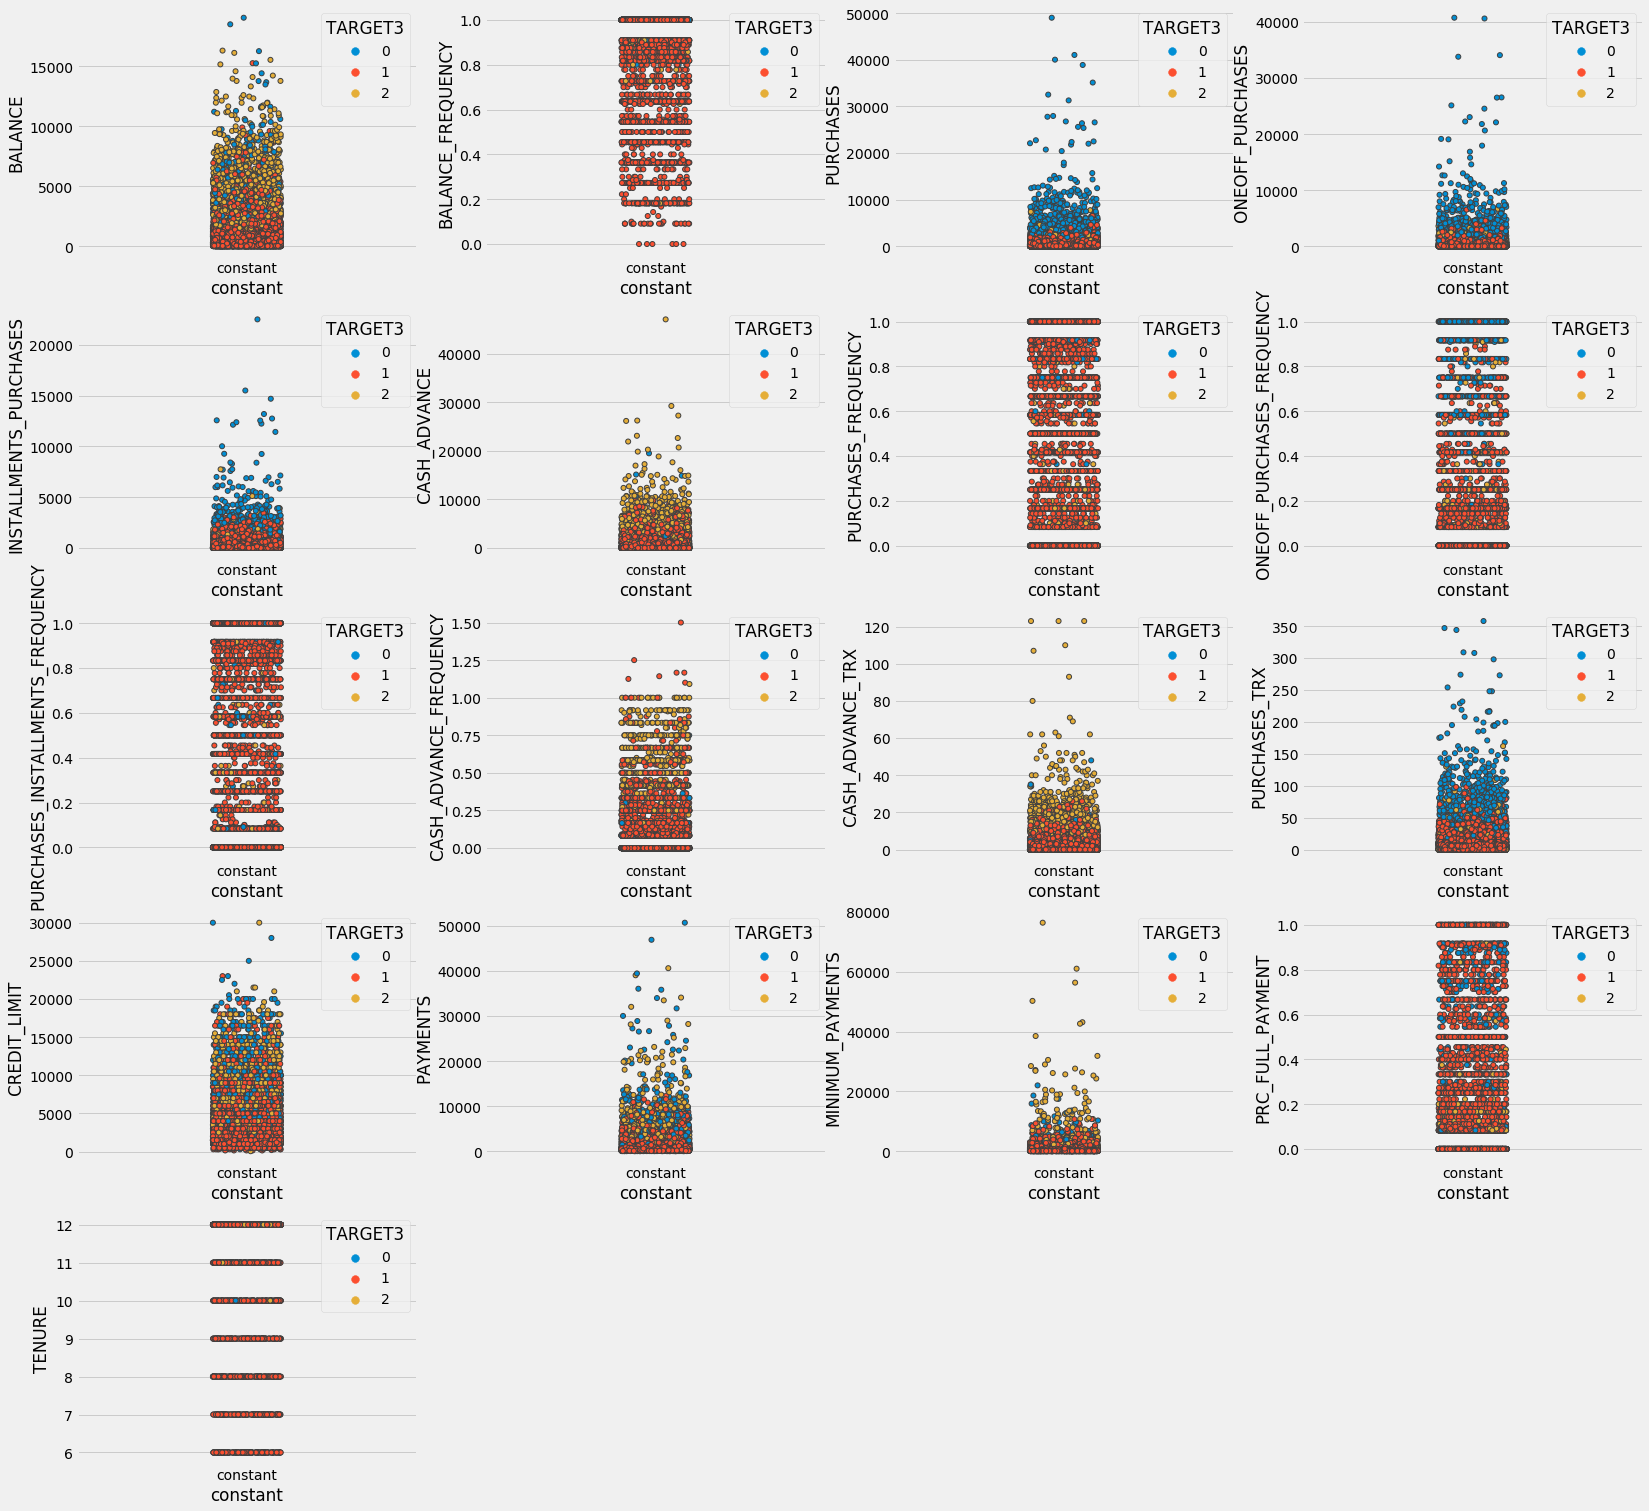

In [123]:
plt.figure(figsize=(25 , 25))

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['TARGET3'] , linewidth=1)
    plt.xlabel('constant')

plt.show()

In [124]:
df['TARGET3'].value_counts()

1    5921
2    1535
0    1163
Name: TARGET3, dtype: int64

## 5) DBSCAN Clustring

In [125]:
from sklearn.cluster import DBSCAN 

def db(epsilons , minimumSamples):
    df_new = pd.DataFrame()          ## create a new dataframe
    for epsilon in epsilons:
        for minsample in minimumSamples:
            db = DBSCAN(eps=epsilon, min_samples=minsample).fit(X)
            labels = db.labels_
            labels_count = len(set(labels))       ## add counts of labels to dataframe
            Num_of_Outliers = np.unique(labels , return_counts=True)              ## add number of Outlires to dataframe
            dictt = {'epsilons': epsilon , 'minimumSamples':minsample , 'labels_count':labels_count 
                     , 'Num_of_Outliers':Num_of_Outliers[1][0]}
            df_new = df_new.append(dictt , ignore_index =True)
    return (df_new)

In [126]:
epsilons = [0.2 , 0.4 , 0.6 , 0.8 , 1]
minimumSamples = [3 , 5 , 10 , 20]
params_df = db(epsilons , minimumSamples)
params_df

epsilons  minimumSamples  labels_count  Num_of_Outliers
0        0.2             3.0          73.0           7966.0
1        0.2             5.0          32.0           8147.0
2        0.2            10.0           8.0           8364.0
3        0.2            20.0           3.0           8481.0
4        0.4             3.0         127.0           6745.0
5        0.4             5.0          34.0           7213.0
6        0.4            10.0          16.0           7608.0
7        0.4            20.0           7.0           7986.0
8        0.6             3.0         105.0           5180.0
9        0.6             5.0          39.0           5635.0
10       0.6            10.0           9.0           6318.0
11       0.6            20.0           3.0           6821.0
12       0.8             3.0         101.0           3816.0
13       0.8             5.0          16.0           4324.0
14       0.8            10.0           9.0           4818.0
15       0.8            20.0           3.0           5380.0
16       1.0             3.0          68.0           2637.0
17       1.0             5.0          20.0           3038.0
18       1.0            10.0           4.0           3582.0
19       1.0            20.0           3.0           4138.0

In [127]:
## با توجه به اطلاعات بالا مشخص است که این الگوریتم مناسب برای مدلسازی ما نیست چون در تمام انواع خود با تغییر پارامترها تعداد داده هایی که 
## به عنوان نویز تشخیص میدهد زیاد است
## با این حال مدلسازی را با اطلاعات سطری که کمترین میزان نویز و تعداد کلاستر کم دارد انجام میدهیم

In [128]:
epsilon = 1  
minimumSamples = 10
## 4 cluster & 3500 number of noises
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0, -1,  0, ...,  0, -1, -1], dtype=int64)

In [129]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True, False,  True, ..., False, False, False])

In [130]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [131]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)            ## set remove repetition values
unique_labels

{-1, 0, 1, 2}

In [132]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

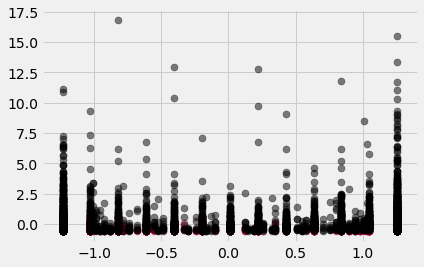

In [133]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 6], xy[:, 13],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 6], xy[:, 13],s=50, c=[col], marker=u'o', alpha=0.5)

In [134]:
## همانطور که گفته شد الگوریتم در مدلسازی تعداد زیادی از داده ها را به عنوان نویز شناسایی کرده است